In [1]:
import pandas as pd
import torch
# 指定文件路径
data_path = '/Users/evelyn/Desktop/extended project/GBR_GMs_2018.csv'
metadata_path = '/Users/evelyn/Desktop/extended project/GBR_GMs_metadata.csv'

/Users/evelyn/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Loading Data

In [2]:
# Reading CSV files
data = pd.read_csv(data_path)  # 'data' dataset contains hourly pollutant and weather data for each site in 2018
metadata = pd.read_csv(metadata_path)  # 'metadata' dataset contains specific information about each site, such as location and type


In [3]:
# 转换 'date' 列为日期类型
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# 提取年、月、日
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [4]:
#合并数据集
# 确保 metadata 中每个 site 只有一条记录
metadata_site = metadata.drop_duplicates(subset='site')

# 使用左连接将 metadata 的信息合并到 data 数据集
merged_data= pd.merge(data, metadata_site[['site', 'site_type', 'latitude', 'longitude']], on='site', how='left')
merged_data

source         site code                      date        nox  \
0         aurn     Aberdeen  ABD 2018-01-01 00:00:00+00:00   24.78805   
1         aurn     Aberdeen  ABD 2018-01-01 01:00:00+00:00   27.52539   
2         aurn     Aberdeen  ABD 2018-01-01 02:00:00+00:00   26.63195   
3         aurn     Aberdeen  ABD 2018-01-01 03:00:00+00:00   32.33472   
4         aurn     Aberdeen  ABD 2018-01-01 04:00:00+00:00  101.16719   
...        ...          ...  ...                       ...        ...   
1472635   aurn  Yarner Wood   YW 2018-12-31 19:00:00+00:00    1.45691   
1472636   aurn  Yarner Wood   YW 2018-12-31 20:00:00+00:00    1.90905   
1472637   aurn  Yarner Wood   YW 2018-12-31 21:00:00+00:00    1.50715   
1472638   aurn  Yarner Wood   YW 2018-12-31 22:00:00+00:00    1.25595   
1472639   aurn  Yarner Wood   YW 2018-12-31 23:00:00+00:00    1.15548   

              no2        no        o3  pm10  pm2.5  ...     wd  air_temp  so2  \
0        20.35892   2.88861  58.80663   6.7    7.9  ...  259.7       2.2  NaN   
1        23.16886   2.84125  52.95257   3.9    6.7  ...  275.7       2.8  NaN   
2        22.60216   2.62816  52.73637   2.0    4.5  ...  275.9       3.1  NaN   
3        28.95842   2.20197  39.71443   4.4    2.7  ...  262.3       1.9  NaN   
4        75.79043  16.55030   3.49248   8.0    6.7  ...  260.4       1.1  NaN   
...           ...       ...       ...   ...    ...  ...    ...       ...  ...   
1472635   1.05183   0.26418  57.92519   NaN    NaN  ...  293.0       6.1  NaN   
1472636   1.45334   0.29721  57.97509   NaN    NaN  ...  294.7       6.0  NaN   
1472637   1.05144   0.29721  64.16176   NaN    NaN  ...  294.7       6.1  NaN   
1472638   0.90151   0.23116  66.15746   NaN    NaN  ...  299.4       6.3  NaN   
1472639   0.64914   0.33023  68.65208   NaN    NaN  ...  305.7       6.6  NaN   

         co  year  month  day         site_type  latitude  longitude  
0       NaN  2018      1    1  Urban Background  57.15736  -2.094278  
1       NaN  2018      1    1  Urban Background  57.15736  -2.094278  
2       NaN  2018      1    1  Urban Background  57.15736  -2.094278  
3       NaN  2018      1    1  Urban Background  57.15736  -2.094278  
4       NaN  2018      1    1  Urban Background  57.15736  -2.094278  
...      ..   ...    ...  ...               ...       ...        ...  
1472635 NaN  2018     12   31  Rural Background  50.59760  -3.716510  
1472636 NaN  2018     12   31  Rural Background  50.59760  -3.716510  
1472637 NaN  2018     12   31  Rural Background  50.59760  -3.716510  
1472638 NaN  2018     12   31  Rural Background  50.59760  -3.716510  
1472639 NaN  2018     12   31  Rural Background  50.59760  -3.716510  

[1472640 rows x 25 columns]

In [5]:
#处理变量
merged_data['source'] = merged_data['source'].astype('category')
merged_data['site'] = merged_data['site'].astype('category')
merged_data['code'] = merged_data['code'].astype('category')
merged_data['site_type'] = merged_data['site_type'].astype('category')


In [6]:
merged_data.isna().sum()

source             0
site               0
code               0
date               0
nox           180530
no2           180535
no            179877
o3            843115
pm10          900854
pm2.5         867048
v10          1077620
v2.5         1021849
nv10         1077618
nv2.5        1021852
ws            147240
wd            147240
air_temp      147240
so2          1264790
co           1413218
year               0
month              0
day                0
site_type       6600
latitude        6600
longitude       6600
dtype: int64

In [7]:
merged_data

source         site code                      date        nox  \
0         aurn     Aberdeen  ABD 2018-01-01 00:00:00+00:00   24.78805   
1         aurn     Aberdeen  ABD 2018-01-01 01:00:00+00:00   27.52539   
2         aurn     Aberdeen  ABD 2018-01-01 02:00:00+00:00   26.63195   
3         aurn     Aberdeen  ABD 2018-01-01 03:00:00+00:00   32.33472   
4         aurn     Aberdeen  ABD 2018-01-01 04:00:00+00:00  101.16719   
...        ...          ...  ...                       ...        ...   
1472635   aurn  Yarner Wood   YW 2018-12-31 19:00:00+00:00    1.45691   
1472636   aurn  Yarner Wood   YW 2018-12-31 20:00:00+00:00    1.90905   
1472637   aurn  Yarner Wood   YW 2018-12-31 21:00:00+00:00    1.50715   
1472638   aurn  Yarner Wood   YW 2018-12-31 22:00:00+00:00    1.25595   
1472639   aurn  Yarner Wood   YW 2018-12-31 23:00:00+00:00    1.15548   

              no2        no        o3  pm10  pm2.5  ...     wd  air_temp  so2  \
0        20.35892   2.88861  58.80663   6.7    7.9  ...  259.7       2.2  NaN   
1        23.16886   2.84125  52.95257   3.9    6.7  ...  275.7       2.8  NaN   
2        22.60216   2.62816  52.73637   2.0    4.5  ...  275.9       3.1  NaN   
3        28.95842   2.20197  39.71443   4.4    2.7  ...  262.3       1.9  NaN   
4        75.79043  16.55030   3.49248   8.0    6.7  ...  260.4       1.1  NaN   
...           ...       ...       ...   ...    ...  ...    ...       ...  ...   
1472635   1.05183   0.26418  57.92519   NaN    NaN  ...  293.0       6.1  NaN   
1472636   1.45334   0.29721  57.97509   NaN    NaN  ...  294.7       6.0  NaN   
1472637   1.05144   0.29721  64.16176   NaN    NaN  ...  294.7       6.1  NaN   
1472638   0.90151   0.23116  66.15746   NaN    NaN  ...  299.4       6.3  NaN   
1472639   0.64914   0.33023  68.65208   NaN    NaN  ...  305.7       6.6  NaN   

         co  year  month  day         site_type  latitude  longitude  
0       NaN  2018      1    1  Urban Background  57.15736  -2.094278  
1       NaN  2018      1    1  Urban Background  57.15736  -2.094278  
2       NaN  2018      1    1  Urban Background  57.15736  -2.094278  
3       NaN  2018      1    1  Urban Background  57.15736  -2.094278  
4       NaN  2018      1    1  Urban Background  57.15736  -2.094278  
...      ..   ...    ...  ...               ...       ...        ...  
1472635 NaN  2018     12   31  Rural Background  50.59760  -3.716510  
1472636 NaN  2018     12   31  Rural Background  50.59760  -3.716510  
1472637 NaN  2018     12   31  Rural Background  50.59760  -3.716510  
1472638 NaN  2018     12   31  Rural Background  50.59760  -3.716510  
1472639 NaN  2018     12   31  Rural Background  50.59760  -3.716510  

[1472640 rows x 25 columns]

## Remove sites with excessive missing rates

In [8]:
# Calculate if all pollutants are empty at each site
pollutants = ['no2', 'o3', 'pm10', 'pm2.5']

a = merged_data.groupby('site', observed=True)[pollutants].apply(lambda x: pd.Series(x.isnull().all(axis=1), name='is_all_null'))


a

site                    
Aberdeen         0          False
                 1          False
                 2          False
                 3          False
                 4          False
                            ...  
York Fishergate  1463875    False
                 1463876    False
                 1463877    False
                 1463878    False
                 1463879    False
Name: is_all_null, Length: 1472640, dtype: bool

/var/folders/0m/gd25hz5n0txcvvd5vlf0vbzh0000gn/T/ipykernel_45879/828285067.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_ratio_site = a.groupby('site').mean()


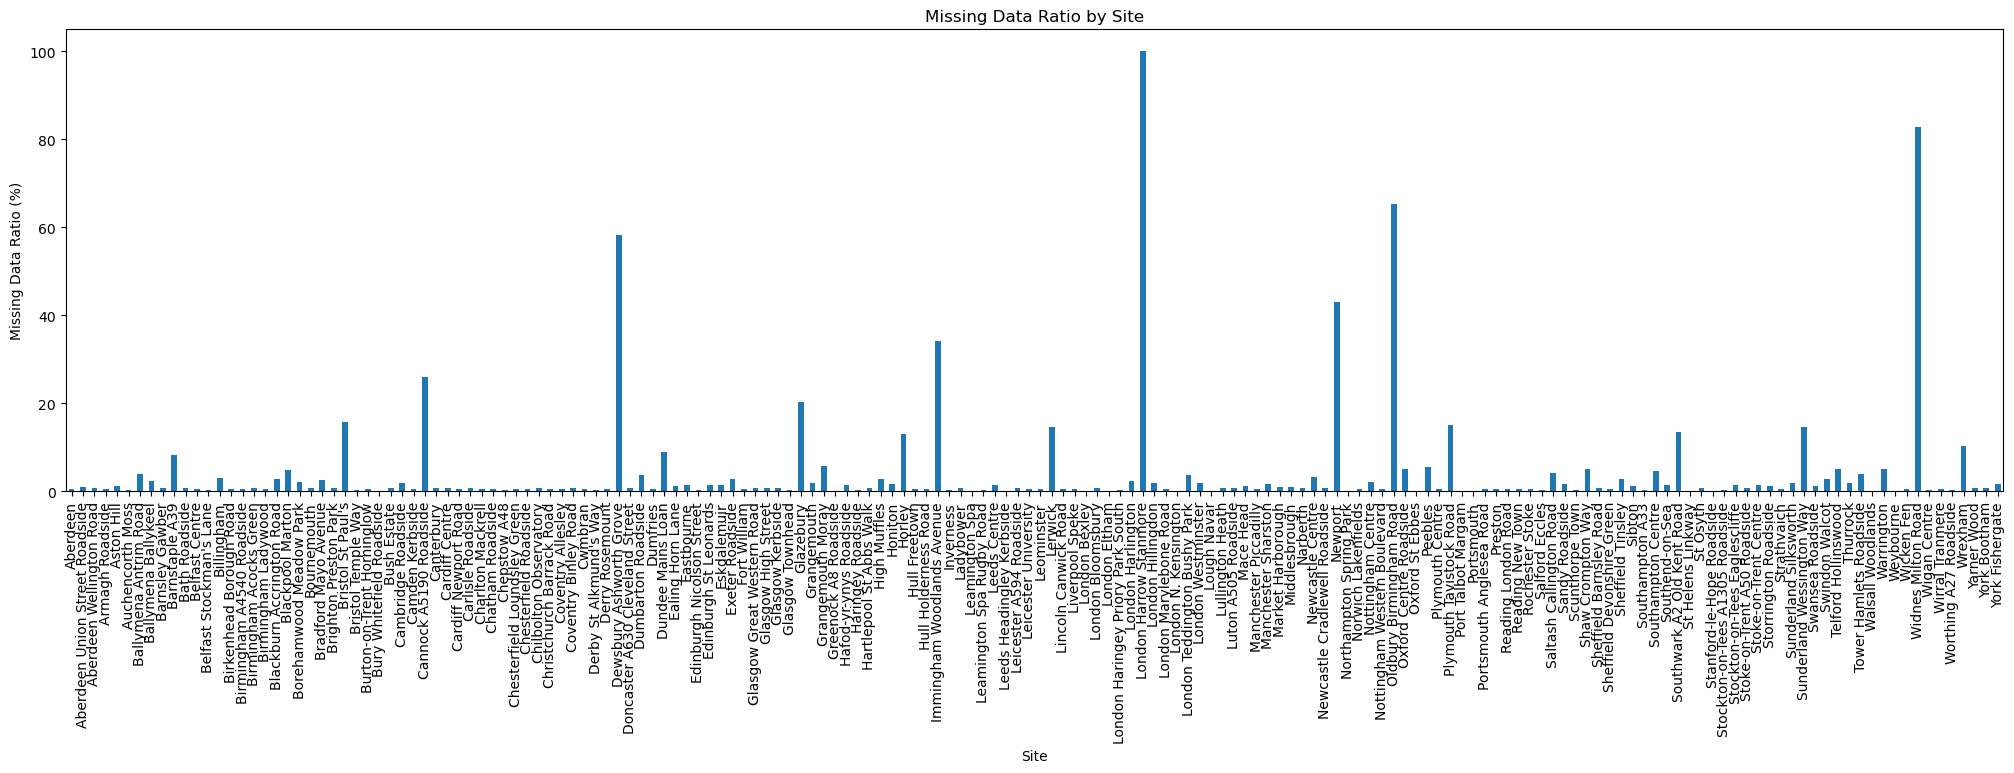

In [9]:
import matplotlib.pyplot as plt
# Calculate the percentage missing for each site
missing_ratio_site = a.groupby('site').mean()

# Convert missing proportions to percentages
missing_ratio_site = missing_ratio_site * 100

# Percentage of missing visualisations
plt.figure(figsize=(25, 6))
missing_ratio_site.plot(kind='bar')
plt.title('Missing Data Ratio by Site')
plt.xlabel('Site')
plt.ylabel('Missing Data Ratio (%)')
plt.show()

In [10]:
# First find a site with a ratio greater than 50
sites_to_remove = missing_ratio_site[missing_ratio_site >= 50].index
sites_to_remove

CategoricalIndex(['Dewsbury Ashworth Grove', 'London Harrow Stanmore',
                  'Oldbury Birmingham Road', 'Widnes Milton Road'],
                 categories=['Aberdeen', 'Aberdeen Union Street Roadside', 'Aberdeen Wellington Road', 'Armagh Roadside', ..., 'Wrexham', 'Yarner Wood', 'York Bootham', 'York Fishergate'], ordered=False, dtype='category', name='site')

In [11]:
# Remove these sites from merged_data
filtered_data = merged_data[~merged_data['site'].isin(sites_to_remove)]
filtered_data

source         site code                      date        nox  \
0         aurn     Aberdeen  ABD 2018-01-01 00:00:00+00:00   24.78805   
1         aurn     Aberdeen  ABD 2018-01-01 01:00:00+00:00   27.52539   
2         aurn     Aberdeen  ABD 2018-01-01 02:00:00+00:00   26.63195   
3         aurn     Aberdeen  ABD 2018-01-01 03:00:00+00:00   32.33472   
4         aurn     Aberdeen  ABD 2018-01-01 04:00:00+00:00  101.16719   
...        ...          ...  ...                       ...        ...   
1472635   aurn  Yarner Wood   YW 2018-12-31 19:00:00+00:00    1.45691   
1472636   aurn  Yarner Wood   YW 2018-12-31 20:00:00+00:00    1.90905   
1472637   aurn  Yarner Wood   YW 2018-12-31 21:00:00+00:00    1.50715   
1472638   aurn  Yarner Wood   YW 2018-12-31 22:00:00+00:00    1.25595   
1472639   aurn  Yarner Wood   YW 2018-12-31 23:00:00+00:00    1.15548   

              no2        no        o3  pm10  pm2.5  ...     wd  air_temp  so2  \
0        20.35892   2.88861  58.80663   6.7    7.9  ...  259.7       2.2  NaN   
1        23.16886   2.84125  52.95257   3.9    6.7  ...  275.7       2.8  NaN   
2        22.60216   2.62816  52.73637   2.0    4.5  ...  275.9       3.1  NaN   
3        28.95842   2.20197  39.71443   4.4    2.7  ...  262.3       1.9  NaN   
4        75.79043  16.55030   3.49248   8.0    6.7  ...  260.4       1.1  NaN   
...           ...       ...       ...   ...    ...  ...    ...       ...  ...   
1472635   1.05183   0.26418  57.92519   NaN    NaN  ...  293.0       6.1  NaN   
1472636   1.45334   0.29721  57.97509   NaN    NaN  ...  294.7       6.0  NaN   
1472637   1.05144   0.29721  64.16176   NaN    NaN  ...  294.7       6.1  NaN   
1472638   0.90151   0.23116  66.15746   NaN    NaN  ...  299.4       6.3  NaN   
1472639   0.64914   0.33023  68.65208   NaN    NaN  ...  305.7       6.6  NaN   

         co  year  month  day         site_type  latitude  longitude  
0       NaN  2018      1    1  Urban Background  57.15736  -2.094278  
1       NaN  2018      1    1  Urban Background  57.15736  -2.094278  
2       NaN  2018      1    1  Urban Background  57.15736  -2.094278  
3       NaN  2018      1    1  Urban Background  57.15736  -2.094278  
4       NaN  2018      1    1  Urban Background  57.15736  -2.094278  
...      ..   ...    ...  ...               ...       ...        ...  
1472635 NaN  2018     12   31  Rural Background  50.59760  -3.716510  
1472636 NaN  2018     12   31  Rural Background  50.59760  -3.716510  
1472637 NaN  2018     12   31  Rural Background  50.59760  -3.716510  
1472638 NaN  2018     12   31  Rural Background  50.59760  -3.716510  
1472639 NaN  2018     12   31  Rural Background  50.59760  -3.716510  

[1445640 rows x 25 columns]

## Division of the data set into four main pollutant datasets

In [12]:
# Find all sites where the No2 column is empty
empty_no2 = filtered_data.groupby('site',observed=True).apply(lambda x: x['no2'].isna().mean())
empty_no2 = empty_no2[empty_no2 == 1]
empty_no2

/var/folders/0m/gd25hz5n0txcvvd5vlf0vbzh0000gn/T/ipykernel_45879/4138088394.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  empty_no2 = filtered_data.groupby('site',observed=True).apply(lambda x: x['no2'].isna().mean())


site
Auchencorth Moss                1.0
Barnstaple A39                  1.0
Birmingham Ladywood             1.0
Ealing Horn Lane                1.0
Lerwick                         1.0
London Teddington Bushy Park    1.0
Lough Navar                     1.0
Mace Head                       1.0
Saltash Callington Road         1.0
Sibton                          1.0
Strathvaich                     1.0
Weybourne                       1.0
dtype: float64

In [13]:
# Find all sites where the Pm2.5 column is empty
empty_pm25 = filtered_data.groupby('site',observed=True).apply(lambda x: x['pm2.5'].isna().mean())
empty_pm25 = empty_pm25[empty_pm25 == 1]
empty_pm25

/var/folders/0m/gd25hz5n0txcvvd5vlf0vbzh0000gn/T/ipykernel_45879/2385624254.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  empty_pm25 = filtered_data.groupby('site',observed=True).apply(lambda x: x['pm2.5'].isna().mean())


site
Aberdeen Union Street Roadside    1.0
Aberdeen Wellington Road          1.0
Armagh Roadside                   1.0
Aston Hill                        1.0
Ballymena Antrim Road             1.0
                                 ... 
Tower Hamlets Roadside            1.0
Walsall Woodlands                 1.0
Weybourne                         1.0
Wicken Fen                        1.0
Yarner Wood                       1.0
Length: 87, dtype: float64

In [14]:
# Find all sites where the PM10 column is empty
empty_pm10 = filtered_data.groupby('site',observed=True).apply(lambda x: x['pm10'].isna().mean())
empty_pm10 = empty_pm10[empty_pm10 == 1]
empty_pm10

/var/folders/0m/gd25hz5n0txcvvd5vlf0vbzh0000gn/T/ipykernel_45879/1916852104.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  empty_pm10 = filtered_data.groupby('site',observed=True).apply(lambda x: x['pm10'].isna().mean())


site
Aberdeen Union Street Roadside    1.0
Aberdeen Wellington Road          1.0
Aston Hill                        1.0
Ballymena Antrim Road             1.0
Ballymena Ballykeel               1.0
                                 ... 
Wicken Fen                        1.0
Wigan Centre                      1.0
Wirral Tranmere                   1.0
Worthing A27 Roadside             1.0
Yarner Wood                       1.0
Length: 91, dtype: float64

In [15]:
# Find all sites where the O3 column is empty
empty_o3 = filtered_data.groupby('site',observed=True).apply(lambda x: x['o3'].isna().mean())
empty_o3 = empty_o3[empty_o3 == 1]
empty_o3

/var/folders/0m/gd25hz5n0txcvvd5vlf0vbzh0000gn/T/ipykernel_45879/256918339.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  empty_o3 = filtered_data.groupby('site',observed=True).apply(lambda x: x['o3'].isna().mean())


site
Aberdeen Union Street Roadside    1.0
Aberdeen Wellington Road          1.0
Armagh Roadside                   1.0
Ballymena Antrim Road             1.0
Ballymena Ballykeel               1.0
                                 ... 
Warrington                        1.0
Worthing A27 Roadside             1.0
Wrexham                           1.0
York Bootham                      1.0
York Fishergate                   1.0
Length: 92, dtype: float64

In [16]:
a = filtered_data.groupby('site',observed=True)[pollutants].mean().reset_index()
counts = a[pollutants].notna().sum(axis=1)
counts

0      4
1      1
2      1
3      2
4      2
      ..
161    2
162    3
163    2
164    3
165    3
Length: 166, dtype: int64

In [17]:
# Get an index with counts equal to 1, i.e. sites measuring only one pollutant.
index = counts[counts == 1].index

# Find the site of these indexes in a
sites_with_1 = a.loc[index, 'site']

sites_with_1 = sites_with_1.reset_index(drop=True).to_frame()
sites_with_1

site
0    Aberdeen Union Street Roadside
1          Aberdeen Wellington Road
2             Ballymena Antrim Road
3               Ballymena Ballykeel
4                     Bath Roadside
5                        Billingham
6           Birkenhead Borough Road
7         Blackburn Accrington Road
8           Borehamwood Meadow Park
9              Bradford Mayo Avenue
10       Burton-on-Trent Horninglow
11               Cambridge Roadside
12           Cannock A5190 Roadside
13                Charlton Mackrell
14           Derby St Alkmund's Way
15  Doncaster A630 Cleveland Street
16               Dumbarton Roadside
17                         Dumfries
18                Dundee Mains Loan
19                 Ealing Horn Lane
20        Edinburgh Nicolson Street
21       Glasgow Great Western Road
22                 Glasgow Kerbside
23                Grangemouth Moray
24           Hafod-yr-ynys Roadside
25                Haringey Roadside
26          Hartlepool St Abbs Walk
27                          Honiton
28                           Horley
29       Immingham Woodlands Avenue
30                          Lerwick
31             Lincoln Canwick Road
32     London Teddington Bushy Park
33              Luton A505 Roadside
34                        Mace Head
35           Oxford Centre Roadside
36          Plymouth Tavistock Road
37                Shaw Crompton Way
38                Sheffield Tinsley
39                           Sibton
40             Storrington Roadside
41                      Strathvaich
42        Sunderland Wessington Way
43                   Swindon Walcot
44              Telford Hollinswood
45           Tower Hamlets Roadside
46                        Weybourne

In [18]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

# Columns that need to be filled with null values
pollutants = ['no2', 'o3', 'pm10', 'pm2.5']

# Missing values filled in using the MICE method
imputer = IterativeImputer(max_iter=10, random_state=0)


In [19]:
# Create a function to generate a DataFrame for each contaminant
def create_pollutant_df(df, pollutant):
    pivot_df = df.pivot(index='date', columns='site', values=pollutant)
    return pivot_df



In [20]:
test = filtered_data.copy()

In [21]:
pm25_data = test[~test['site'].isin(empty_pm25.index)]
pm10_data = test[~test['site'].isin(empty_pm10.index)]
o3_data = test[~test['site'].isin(empty_o3.index)]
no2_data = test[~test['site'].isin(empty_no2.index)]

In [22]:
# Four different DataFrames were generated, using the original dataset with the removal of sites with no records of the pollutant at all
pm25_df = create_pollutant_df(pm25_data, 'pm2.5')
o3_df = create_pollutant_df(o3_data, 'o3')
no2_df = create_pollutant_df(no2_data, 'no2')
pm10_df = create_pollutant_df(pm10_data, 'pm10')

In [23]:
pm25_df

site                       Aberdeen  Auchencorth Moss  \
date                                                    
2018-01-01 00:00:00+00:00       7.9             1.200   
2018-01-01 01:00:00+00:00       6.7             1.600   
2018-01-01 02:00:00+00:00       4.5             1.200   
2018-01-01 03:00:00+00:00       2.7             1.100   
2018-01-01 04:00:00+00:00       6.7             3.000   
...                             ...               ...   
2018-12-31 19:00:00+00:00       3.1             3.962   
2018-12-31 20:00:00+00:00       1.7             2.571   
2018-12-31 21:00:00+00:00       3.9             1.722   
2018-12-31 22:00:00+00:00       2.3             1.038   
2018-12-31 23:00:00+00:00       7.0             0.660   

site                       Birmingham Acocks Green  Belfast Centre  \
date                                                                 
2018-01-01 00:00:00+00:00                     21.0             7.0   
2018-01-01 01:00:00+00:00                      5.3             7.3   
2018-01-01 02:00:00+00:00                      1.2             7.2   
2018-01-01 03:00:00+00:00                      1.1             9.2   
2018-01-01 04:00:00+00:00                      3.0             5.2   
...                                            ...             ...   
2018-12-31 19:00:00+00:00                      7.2            16.7   
2018-12-31 20:00:00+00:00                      4.8            15.9   
2018-12-31 21:00:00+00:00                      5.1            12.5   
2018-12-31 22:00:00+00:00                      6.8            10.2   
2018-12-31 23:00:00+00:00                      9.1            11.6   

site                       London Bexley  Birmingham A4540 Roadside  \
date                                                                  
2018-01-01 00:00:00+00:00           10.5                     11.004   
2018-01-01 01:00:00+00:00            7.7                      6.479   
2018-01-01 02:00:00+00:00            3.5                      0.000   
2018-01-01 03:00:00+00:00            3.3                      3.188   
2018-01-01 04:00:00+00:00            2.4                      3.600   
...                                  ...                        ...   
2018-12-31 19:00:00+00:00            9.5                      5.100   
2018-12-31 20:00:00+00:00           12.9                      5.000   
2018-12-31 21:00:00+00:00           11.3                      5.100   
2018-12-31 22:00:00+00:00           11.5                      5.800   
2018-12-31 23:00:00+00:00            9.4                      5.800   

site                       Blackpool Marton  Birmingham Ladywood  Bournemouth  \
date                                                                            
2018-01-01 00:00:00+00:00               1.6                  NaN         18.0   
2018-01-01 01:00:00+00:00               6.4                  NaN          7.0   
2018-01-01 02:00:00+00:00               4.2                  NaN          6.0   
2018-01-01 03:00:00+00:00               2.7                  NaN          7.0   
2018-01-01 04:00:00+00:00               5.4                  NaN         10.0   
...                                     ...                  ...          ...   
2018-12-31 19:00:00+00:00               NaN                  7.9         12.0   
2018-12-31 20:00:00+00:00               NaN                  8.9         13.0   
2018-12-31 21:00:00+00:00               NaN                  6.2         10.0   
2018-12-31 22:00:00+00:00               NaN                  8.3         13.0   
2018-12-31 23:00:00+00:00               NaN                  8.4         13.0   

site                       Barnstaple A39  ...  Sunderland Silksworth  \
date                                       ...                          
2018-01-01 00:00:00+00:00             2.3  ...                    3.1   
2018-01-01 01:00:00+00:00             4.1  ...                    2.0   
2018-01-01 02:00:00+00:00             4.7  ...                    2.7   
2018

In [24]:
pm25_df.isna().sum()

site
Aberdeen                    217
Auchencorth Moss            734
Birmingham Acocks Green     200
Belfast Centre              492
London Bexley               104
                           ... 
Wigan Centre               1953
Wrexham                    7403
Worthing A27 Roadside      2184
York Bootham                391
York Fishergate             587
Length: 79, dtype: int64

# Fill in missing values

## Perform Mice  interpolation on each of the four datasets first

In [25]:
pm25_array = imputer.fit_transform(pm25_df)
pm10_array = imputer.fit_transform(pm10_df)
o3_array = imputer.fit_transform(o3_df)
no2_array = imputer.fit_transform(no2_df)

/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [26]:
pm25_df.describe()

site      Aberdeen  Auchencorth Moss  Birmingham Acocks Green  Belfast Centre  \
count  8543.000000       8026.000000              8560.000000     8268.000000   
mean      6.870818          4.978770                 9.292745       10.014265   
std       5.282866          4.836232                 8.262051        7.762193   
min      -3.800000         -4.000000                -3.000000       -2.378000   
25%       3.500000          1.804000                 4.100000        5.000000   
50%       5.600000          3.500000                 6.800000        8.000000   
75%       8.900000          6.669000                11.900000       12.900000   
max      50.800000         38.800000               106.700000      125.700000   

site   London Bexley  Birmingham A4540 Roadside  Blackpool Marton  \
count    8656.000000                8263.000000       7370.000000   
mean       11.920206                  11.794929          8.509647   
std         9.585627                   8.836981          7.657352   
min        -2.400000                  -2.300000         -4.800000   
25%         6.000000                   6.100000          3.800000   
50%         8.900000                   9.500000          6.500000   
75%        14.500000                  14.600000         11.100000   
max       164.500000                  79.600000         98.500000   

site   Birmingham Ladywood  Bournemouth  Barnstaple A39  ...  \
count          3125.000000  8405.000000     7965.000000  ...   
mean             10.134560    10.525164        6.927558  ...   
std               7.851269     7.298295        5.885684  ...   
min              -0.900000    -5.000000       -4.000000  ...   
25%               5.200000     6.000000        3.000000  ...   
50%               7.700000     9.000000        5.600000  ...   
75%              12.400000    13.000000        9.000000  ...   
max              59.300000    57.000000       46.000000  ...   

site   Sunderland Silksworth  Swansea Roadside  London Teddington Bushy Park  \
count            7897.000000       8065.000000                   8426.000000   
mean                8.435393         12.822443                     11.368716   
std                 7.494969          7.578342                      8.850636   
min                -3.700000         -4.000000                     -2.400000   
25%                 4.100000          7.000000                      5.900000   
50%                 6.300000         11.000000                      8.800000   
75%                10.100000         17.000000                     13.900000   
max               127.700000         97.000000                     82.100000   

site   Wirral Tranmere   Warrington  Wigan Centre      Wrexham  \
count      8224.000000  7874.000000   6807.000000  1357.000000   
mean          8.376058     8.962929     11.625856     9.539475   
std           8.159956     7.747874      9.353287     9.969863   
min          -3.700000    -2.500000     -3.600000     0.472000   
25%           3.200000     4.200000      5.900000     3.302000   
50%           6.000000     6.800000      9.600000     5.943000   
75%          11.000000    11.100000     15.000000    11.297000   
max         159.100000   120.000000    184.700000    55.802000   

site   Worthing A27 Roadside  York Bootham  York Fishergate  
count            6576.000000   8369.000000      8173.000000  
mean               10.420925     10.764858        10.456283  
std                 7.825578      8.581384         8.416541  
min                -3.000000     -3.500000        -3.300000  
25%                 6.000000      5.500000         5.300000  
50%                 8.000000      8.400000         8.000000  
75%                13.000000     13.200000        12.800000  
max                91.000000    132.700000       123.000000  

[8 rows x 79 columns]

In [27]:
# Convert NumPy arrays back to DataFrame
pm25_df = pd.DataFrame(pm25_array, columns=pm25_df.columns, index=pm25_df.index)
pm10_df = pd.DataFrame(pm10_array, columns=pm10_df.columns, index=pm10_df.index)
o3_df = pd.DataFrame(o3_array, columns=o3_df.columns, index=o3_df.index)
no2_df = pd.DataFrame(no2_array, columns=no2_df.columns, index=no2_df.index)
pm25_df

site                       Aberdeen  Auchencorth Moss  \
date                                                    
2018-01-01 00:00:00+00:00       7.9             1.200   
2018-01-01 01:00:00+00:00       6.7             1.600   
2018-01-01 02:00:00+00:00       4.5             1.200   
2018-01-01 03:00:00+00:00       2.7             1.100   
2018-01-01 04:00:00+00:00       6.7             3.000   
...                             ...               ...   
2018-12-31 19:00:00+00:00       3.1             3.962   
2018-12-31 20:00:00+00:00       1.7             2.571   
2018-12-31 21:00:00+00:00       3.9             1.722   
2018-12-31 22:00:00+00:00       2.3             1.038   
2018-12-31 23:00:00+00:00       7.0             0.660   

site                       Birmingham Acocks Green  Belfast Centre  \
date                                                                 
2018-01-01 00:00:00+00:00                     21.0             7.0   
2018-01-01 01:00:00+00:00                      5.3             7.3   
2018-01-01 02:00:00+00:00                      1.2             7.2   
2018-01-01 03:00:00+00:00                      1.1             9.2   
2018-01-01 04:00:00+00:00                      3.0             5.2   
...                                            ...             ...   
2018-12-31 19:00:00+00:00                      7.2            16.7   
2018-12-31 20:00:00+00:00                      4.8            15.9   
2018-12-31 21:00:00+00:00                      5.1            12.5   
2018-12-31 22:00:00+00:00                      6.8            10.2   
2018-12-31 23:00:00+00:00                      9.1            11.6   

site                       London Bexley  Birmingham A4540 Roadside  \
date                                                                  
2018-01-01 00:00:00+00:00           10.5                     11.004   
2018-01-01 01:00:00+00:00            7.7                      6.479   
2018-01-01 02:00:00+00:00            3.5                      0.000   
2018-01-01 03:00:00+00:00            3.3                      3.188   
2018-01-01 04:00:00+00:00            2.4                      3.600   
...                                  ...                        ...   
2018-12-31 19:00:00+00:00            9.5                      5.100   
2018-12-31 20:00:00+00:00           12.9                      5.000   
2018-12-31 21:00:00+00:00           11.3                      5.100   
2018-12-31 22:00:00+00:00           11.5                      5.800   
2018-12-31 23:00:00+00:00            9.4                      5.800   

site                       Blackpool Marton  Birmingham Ladywood  Bournemouth  \
date                                                                            
2018-01-01 00:00:00+00:00          1.600000            10.796675         18.0   
2018-01-01 01:00:00+00:00          6.400000             4.971477          7.0   
2018-01-01 02:00:00+00:00          4.200000             2.322550          6.0   
2018-01-01 03:00:00+00:00          2.700000             3.996568          7.0   
2018-01-01 04:00:00+00:00          5.400000             4.013070         10.0   
...                                     ...                  ...          ...   
2018-12-31 19:00:00+00:00          5.670807             7.900000         12.0   
2018-12-31 20:00:00+00:00          8.368255             8.900000         13.0   
2018-12-31 21:00:00+00:00          4.544446             6.200000         10.0   
2018-12-31 22:00:00+00:00          5.430085             8.300000         13.0   
2018-12-31 23:00:00+00:00          4.327220             8.400000         13.0   

site                       Barnstaple A39  ...  Sunderland Silksworth  \
date                                       ...                          
2018-01-01 00:00:00+00:00             2.3  ...               3.100000   
2018-01-01 01:00:00+00:00             4.1  ...               2.000000   
2018-01-01 02:00:00+00:00             4.7  ...               2.700000   
2018

In [28]:
pm25_df.isna().sum()

site
Aberdeen                   0
Auchencorth Moss           0
Birmingham Acocks Green    0
Belfast Centre             0
London Bexley              0
                          ..
Wigan Centre               0
Wrexham                    0
Worthing A27 Roadside      0
York Bootham               0
York Fishergate            0
Length: 79, dtype: int64

## Calculate the distance between stations in each pollutant data set.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pm25_df = pd.DataFrame(scaler.fit_transform(pm25_df), columns=pm25_df.columns, index=pm25_df.index)
pm10_df = pd.DataFrame(scaler.fit_transform(pm10_df), columns=pm10_df.columns, index=pm10_df.index)
o3_df = pd.DataFrame(scaler.fit_transform(o3_df), columns=o3_df.columns, index=o3_df.index)
no2_df = pd.DataFrame(scaler.fit_transform(no2_df), columns=no2_df.columns, index=no2_df.index)


In [30]:
pm25_df.describe()

site       Aberdeen  Auchencorth Moss  Birmingham Acocks Green  \
count  8.760000e+03      8.760000e+03             8.760000e+03   
mean  -6.488975e-17      3.568936e-17            -5.677853e-17   
std    1.000057e+00      1.000057e+00             1.000057e+00   
min   -2.035095e+00     -2.264302e+00            -1.494569e+00   
25%   -6.404938e-01     -6.533296e-01            -6.326808e-01   
50%   -2.393070e-01     -2.965768e-01            -3.049204e-01   
75%    3.720252e-01      3.535528e-01             3.263219e-01   
max    8.395761e+00      7.090305e+00             1.182221e+01   

site   Belfast Centre  London Bexley  Birmingham A4540 Roadside  \
count    8.760000e+03   8.760000e+03               8.760000e+03   
mean     1.881803e-16   6.448419e-17              -5.840077e-17   
std      1.000057e+00   1.000057e+00               1.000057e+00   
min     -1.608592e+00  -1.494993e+00              -1.596273e+00   
25%     -6.310060e-01  -6.154455e-01              -6.425591e-01   
50%     -2.649361e-01  -3.117924e-01              -2.648181e-01   
75%      3.595505e-01   2.745724e-01               3.169942e-01   
max      1.522479e+01   1.598077e+01               7.567270e+00   

site   Blackpool Marton  Birmingham Ladywood   Bournemouth  Barnstaple A39  \
count      8.760000e+03         8.760000e+03  8.760000e+03    8.760000e+03   
mean       3.731160e-17        -8.516779e-17 -3.013318e-16    4.623395e-17   
std        1.000057e+00         1.000057e+00  1.000057e+00    1.000057e+00   
min       -3.091071e+00        -3.970133e+00 -2.131151e+00   -1.883513e+00   
25%       -6.123176e-01        -6.313295e-01 -6.187196e-01   -6.930595e-01   
50%       -2.549279e-01        -2.963320e-01 -2.062382e-01   -2.068178e-01   
75%        3.262731e-01         2.946622e-01  3.437370e-01    4.335610e-01   
max        1.193307e+01         7.568097e+00  6.393464e+00    6.499965e+00   

site   ...  Sunderland Silksworth  Swansea Roadside  \
count  ...           8.760000e+03      8.760000e+03   
mean   ...           4.217834e-17      2.206251e-16   
std    ...           1.000057e+00      1.000057e+00   
min    ...          -2.001375e+00     -2.250025e+00   
25%    ...          -5.947049e-01     -6.513752e-01   
50%    ...          -2.847944e-01     -2.517127e-01   
75%    ...           2.675737e-01      5.476123e-01   
max    ...           1.604614e+01      1.120528e+01   

site   London Teddington Bushy Park  Wirral Tranmere    Warrington  \
count                  8.760000e+03     8.760000e+03  8.760000e+03   
mean                  -2.190029e-17    -1.200460e-16  3.082263e-17   
std                    1.000057e+00     1.000057e+00  1.000057e+00   
min                   -1.573301e+00    -1.477490e+00 -1.525256e+00   
25%                   -6.231932e-01    -6.270402e-01 -6.374764e-01   
50%                   -2.797808e-01    -2.893617e-01 -2.900843e-01   
75%                    2.811262e-01     2.984490e-01  3.403681e-01   
max                    8.099483e+00     1.888327e+01  1.423605e+01   

site   Wigan Centre       Wrexham  Worthing A27 Roadside  York Bootham  \
count  8.760000e+03  8.760000e+03           8.760000e+03  8.760000e+03   
mean  -1.419463e-16  3.406712e-17           7.300097e-17 -3.528380e-17   
std    1.000057e+00  1.000057e+00           1.000057e+00  1.000057e+00   
min   -3.086665e+00 -5.184931e+00          -1.772528e+00 -1.674292e+00   
25%   -5.920398e-01 -6.573108e-01          -6.081719e-01 -6.100880e-01   
50%   -2.254104e-01 -3.019572e-01          -2.796489e-01 -2.671779e-01   
75%    3.542986e-01  3.788058e-01           2.860699e-01  2.885730e-01   
max    1.961258e+01  7.362904e+00           1.098480e+01  1.443066e+01   

site   York Fishergate  
count     8.760000e+03  
mean      1.354573e-16  
std       1.000057e+00  
min      -1.646315e+00  
25%      -6.065012e-01  
50%      -2.800480e-01  
75%       2.761315e-01  
max       1.362444e+01  

[8 rows x 79 columns]

In [31]:
pd.set_option('display.float_format', '{:.6f}'.format)
o3_data.describe()

nox           no2            no            o3          pm10  \
count 563544.000000 563539.000000 563630.000000 629525.000000 248391.000000   
mean      30.239521     18.772534      7.480645     50.260849     15.096463   
std       49.481810     18.513980     22.650397     25.112254     11.329359   
min        0.000000     -0.558840     -0.722020     -2.461360     -4.700000   
25%        7.702320      6.248915      0.629710     33.128620      7.979500   
50%       16.155525     13.105790      1.606060     51.289490     12.561000   
75%       32.766317     25.239725      4.717995     67.105410     19.368500   
max     1035.859490    258.665420    599.285060    204.858610    555.500000   

              pm2.5           v10          v2.5          nv10         nv2.5  \
count 352331.000000 206170.000000 294552.000000 206172.000000 294549.000000   
mean       9.790782      2.917016      2.627781     13.019282      7.784449   
std        8.440671      2.914811      2.662461     10.265950      6.917803   
min       -5.000000     -9.900000     -9.600000     -6.900000     -8.600000   
25%        4.500000      1.100000      0.900000      6.800000      3.600000   
50%        7.400000      2.500000      2.200000     11.000000      6.100000   
75%       12.400000      4.200000      3.800000     16.900000     10.100000   
max      296.600000     29.500000     26.300000    550.600000    291.200000   

                 ws            wd      air_temp           so2           co  \
count 627120.000000 627120.000000 627120.000000 184476.000000 59422.000000   
mean       4.825247    194.305580      9.245950      1.805138     0.161065   
std        2.803507     94.520894      5.649162      2.414416     0.169820   
min        0.000000      0.000000     -7.900000     -2.133430     0.000000   
25%        2.800000    116.600000      5.200000      0.731560     0.075807   
50%        4.200000    212.600000      9.000000      1.227370     0.111569   
75%        6.300000    267.400000     13.200000      2.090075     0.177615   
max       24.200000    360.000000     30.500000    130.647960     5.088064   

               year         month           day      latitude     longitude  
count 648240.000000 648240.000000 648240.000000 648240.000000 648240.000000  
mean    2018.000000      6.526027     15.720548     53.020252     -1.983896  
std        0.000000      3.447854      8.796254      1.888223      2.081561  
min     2018.000000      1.000000      1.000000     50.371670     -9.903917  
25%     2018.000000      4.000000      8.000000     51.521050     -3.034178  
50%     2018.000000      7.000000     16.000000     52.580042     -1.681267  
75%     2018.000000     10.000000     23.000000     53.803780     -0.460861  
max     2018.000000     12.000000     31.000000     60.139220      1.463497

In [32]:
no2_df = no2_df.T
no2_df

date                            2018-01-01 00:00:00+00:00  \
site                                                        
Aberdeen                                         0.000803   
Aberdeen Union Street Roadside                   1.532833   
Aberdeen Wellington Road                        -0.922710   
Birmingham Acocks Green                         -0.775519   
Aston Hill                                      -0.620932   
...                                                   ...   
Wrexham                                         -1.218430   
Worthing A27 Roadside                           -1.464195   
York Bootham                                    -0.882219   
York Fishergate                                 -1.324452   
Yarner Wood                                     -0.997853   

date                            2018-01-01 01:00:00+00:00  \
site                                                        
Aberdeen                                         0.150267   
Aberdeen Union Street Roadside                   0.838130   
Aberdeen Wellington Road                        -0.792070   
Birmingham Acocks Green                         -0.919184   
Aston Hill                                      -0.682823   
...                                                   ...   
Wrexham                                         -0.897624   
Worthing A27 Roadside                           -1.295328   
York Bootham                                    -1.001665   
York Fishergate                                 -1.057758   
Yarner Wood                                     -0.877920   

date                            2018-01-01 02:00:00+00:00  \
site                                                        
Aberdeen                                         0.120123   
Aberdeen Union Street Roadside                   2.133658   
Aberdeen Wellington Road                        -0.621783   
Birmingham Acocks Green                         -0.935902   
Aston Hill                                      -0.695894   
...                                                   ...   
Wrexham                                         -1.043428   
Worthing A27 Roadside                           -1.403511   
York Bootham                                    -0.816714   
York Fishergate                                 -0.994054   
Yarner Wood                                     -0.952873   

date                            2018-01-01 03:00:00+00:00  \
site                                                        
Aberdeen                                         0.458219   
Aberdeen Union Street Roadside                   0.841260   
Aberdeen Wellington Road                        -0.856671   
Birmingham Acocks Green                         -1.128095   
Aston Hill                                      -0.710833   
...                                                   ...   
Wrexham                                         -1.275420   
Worthing A27 Roadside                           -1.524946   
York Bootham                                    -0.684410   
York Fishergate                                 -1.039627   
Yarner Wood                                     -0.919196   

date                            2018-01-01 04:00:00+00:00  \
site                                                        
Aberdeen                                         2.949260   
Aberdeen Union Street Roadside                   0.796544   
Aberdeen Wellington Road                        -0.967660   
Birmingham Acocks Green                         -1.128193   
Aston Hill                                      -0.726573   
...                                                   ...   
Wrexham                                         -1.260242   
Worthing A27 Roadside                           -1.556678   
York Bootham                                    -0.429886   
York Fishergate                                 -1.184667   
Yarner Wood                                     -0.941605   

date                          

In [33]:
no2_df.columns[no2_df.isna().sum() != 0]

DatetimeIndex([], dtype='datetime64[ns, UTC]', name='date', freq=None)

In [34]:
# Calculate the distance vector
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

distance_no2 = squareform(pdist(no2_df,metric = 'euclidean'))

In [35]:
distance_no2

array([[  0.        , 101.63874703, 104.06505843, ..., 102.79388026,
        107.40083264, 128.06972895],
       [101.63874703,   0.        ,  69.91068327, ..., 117.36590304,
         97.04487591, 126.28108553],
       [104.06505843,  69.91068327,   0.        , ..., 119.98936219,
         93.56955939, 123.97134216],
       ...,
       [102.79388026, 117.36590304, 119.98936219, ...,   0.        ,
         75.6000227 , 118.67755464],
       [107.40083264,  97.04487591,  93.56955939, ...,  75.6000227 ,
          0.        , 116.50029447],
       [128.06972895, 126.28108553, 123.97134216, ..., 118.67755464,
        116.50029447,   0.        ]])

In [36]:
no2_df.T.columns

CategoricalIndex(['Aberdeen', 'Aberdeen Union Street Roadside',
                  'Aberdeen Wellington Road', 'Birmingham Acocks Green',
                  'Aston Hill', 'Armagh Roadside', 'Ballymena Antrim Road',
                  'Ballymena Ballykeel', 'Barnsley Gawber', 'Bath Roadside',
                  ...
                  'Wirral Tranmere', 'Walsall Woodlands', 'Warrington',
                  'Wicken Fen', 'Wigan Centre', 'Wrexham',
                  'Worthing A27 Roadside', 'York Bootham', 'York Fishergate',
                  'Yarner Wood'],
                 categories=['Aberdeen', 'Aberdeen Union Street Roadside', 'Aberdeen Wellington Road', 'Armagh Roadside', ..., 'Wrexham', 'Yarner Wood', 'York Bootham', 'York Fishergate'], ordered=False, dtype='category', name='site', length=154)

## Clustering using inter-site distances

/var/folders/0m/gd25hz5n0txcvvd5vlf0vbzh0000gn/T/ipykernel_45879/2062870866.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_no2,'ward')


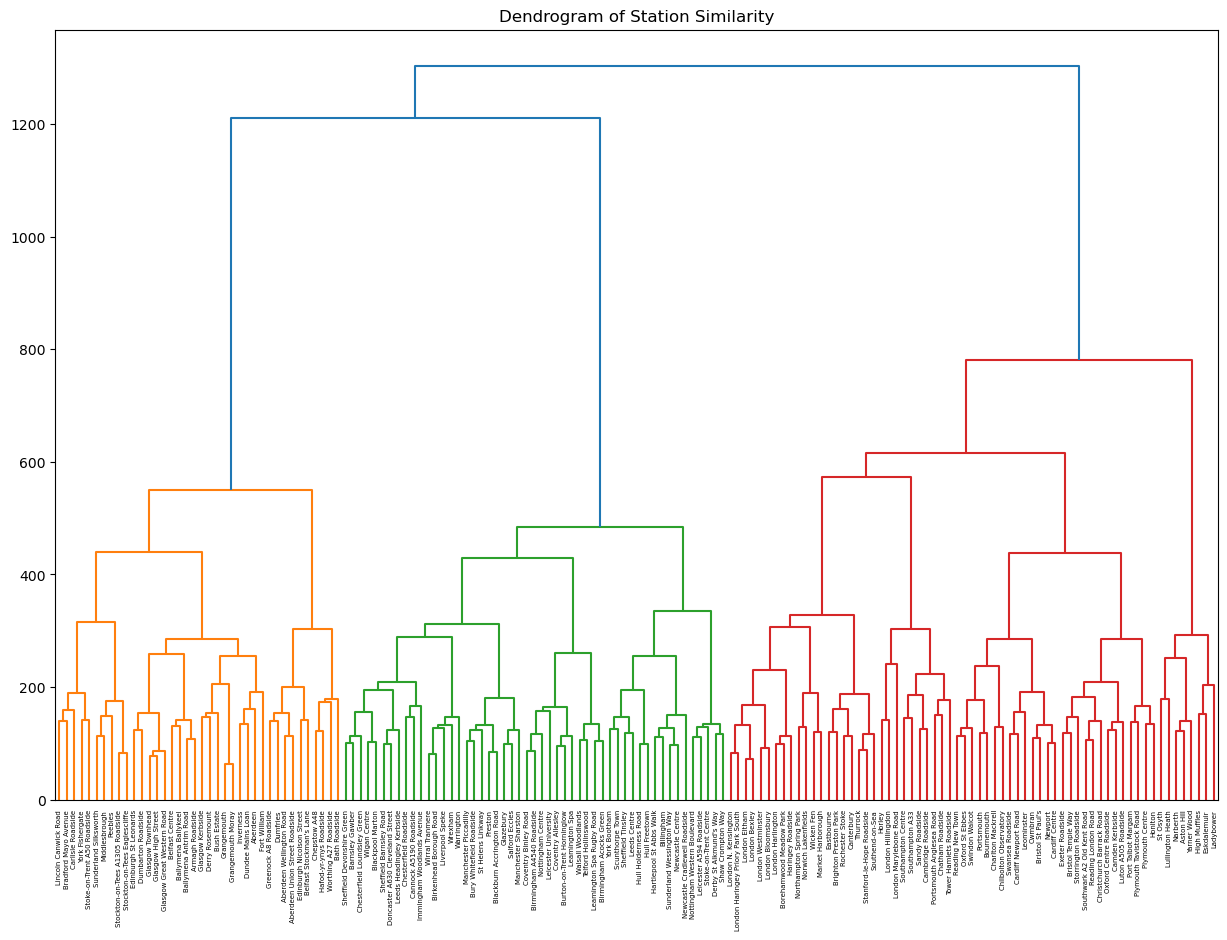

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage


#Hierarchical clustering using linkage
linked = linkage(distance_no2,'ward')

plt.figure(figsize=(15,10))
dendrogram(linked, labels = no2_df.T.columns, orientation = 'top', distance_sort = 'descending', show_leaf_counts=True)
plt.title('Dendrogram of Station Similarity')
plt.show()

/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

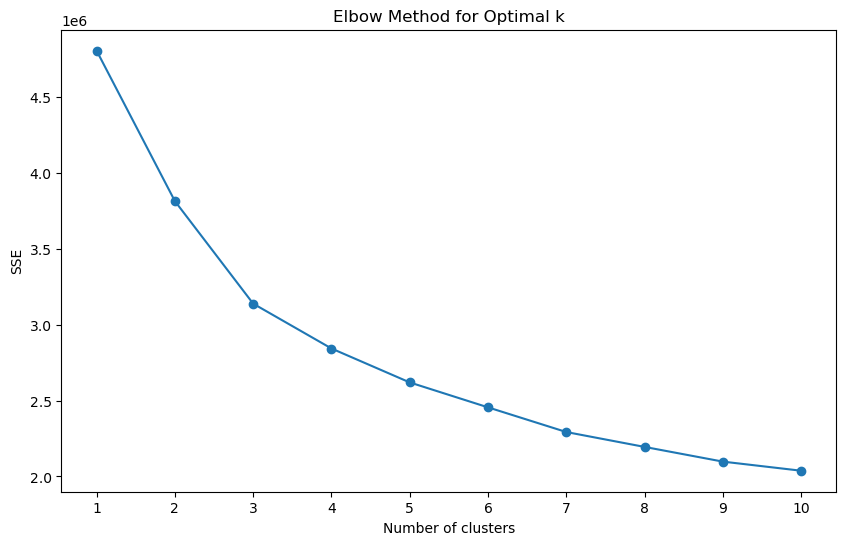

In [38]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(distance_no2)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

In [39]:
# Calculate the distance vector
o3_df = o3_df.T
distance_o3 = squareform(pdist(o3_df,metric = 'euclidean'))

pm10_df = pm10_df.T
distance_pm10 = squareform(pdist(pm10_df,metric = 'euclidean'))

pm25_df = pm25_df.T
distance_pm25 = squareform(pdist(pm25_df,metric = 'euclidean'))

In [40]:
pm25_df

date                     2018-01-01 00:00:00+00:00  2018-01-01 01:00:00+00:00  \
site                                                                            
Aberdeen                                  0.200088                  -0.029162   
Auchencorth Moss                         -0.800228                  -0.716286   
Birmingham Acocks Green                   1.418857                  -0.487009   
Belfast Centre                           -0.376034                  -0.336605   
London Bexley                            -0.144260                  -0.437442   
...                                            ...                        ...   
Wigan Centre                              0.534493                   0.174104   
Wrexham                                  -0.970750                  -0.681828   
Worthing A27 Roadside                    -0.782567                  -0.880483   
York Bootham                             -0.740157                  -0.456370   
York Fishergate                          -0.074503                  -0.473502   

date                     2018-01-01 02:00:00+00:00  2018-01-01 03:00:00+00:00  \
site                                                                            
Aberdeen                                 -0.449452                  -0.793327   
Auchencorth Moss                         -0.800228                  -0.821213   
Birmingham Acocks Green                  -0.984720                  -0.996859   
Belfast Centre                           -0.349748                  -0.086887   
London Bexley                            -0.877216                  -0.898157   
...                                            ...                        ...   
Wigan Centre                              0.117793                  -0.636771   
Wrexham                                  -0.557451                  -1.076079   
Worthing A27 Roadside                    -0.308889                  -0.784496   
York Bootham                             -0.007039                  -0.042513   
York Fishergate                          -0.231685                  -0.376775   

date                     2018-01-01 04:00:00+00:00  2018-01-01 05:00:00+00:00  \
site                                                                            
Aberdeen                                 -0.029162                  -0.774223   
Auchencorth Moss                         -0.422490                  -0.296577   
Birmingham Acocks Green                  -0.766213                  -0.924023   
Belfast Centre                           -0.612610                  -0.481179   
London Bexley                            -0.992394                  -0.960982   
...                                            ...                        ...   
Wigan Centre                             -0.546674                  -0.704344   
Wrexham                                  -0.761503                  -0.808985   
Worthing A27 Roadside                    -0.805975                  -0.483405   
York Bootham                             -0.763806                  -1.307733   
York Fishergate                          -0.352593                  -0.666955   

date                     2018-01-01 06:00:00+00:00  2018-01-01 07:00:00+00:00  \
site                                                                            
Aberdeen                                 -0.678702                  -0.602286   
Auchencorth Moss                         -0.779242                  -1.031068   
Birmingham Acocks Green                  -0.851188                  -0.839048   
Belfast Centre                           -0.507465                  -0.546894   
London Bexley                            -0.762037                  -0.604975   
...                                            ...                        ...   
Wigan Centre                             -0.659295                  -0.738130   
Wrexham                                  -0.780783                  -0.781611   
Worthing A27 Roadside       

/var/folders/0m/gd25hz5n0txcvvd5vlf0vbzh0000gn/T/ipykernel_45879/3989374761.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_o3,'ward')


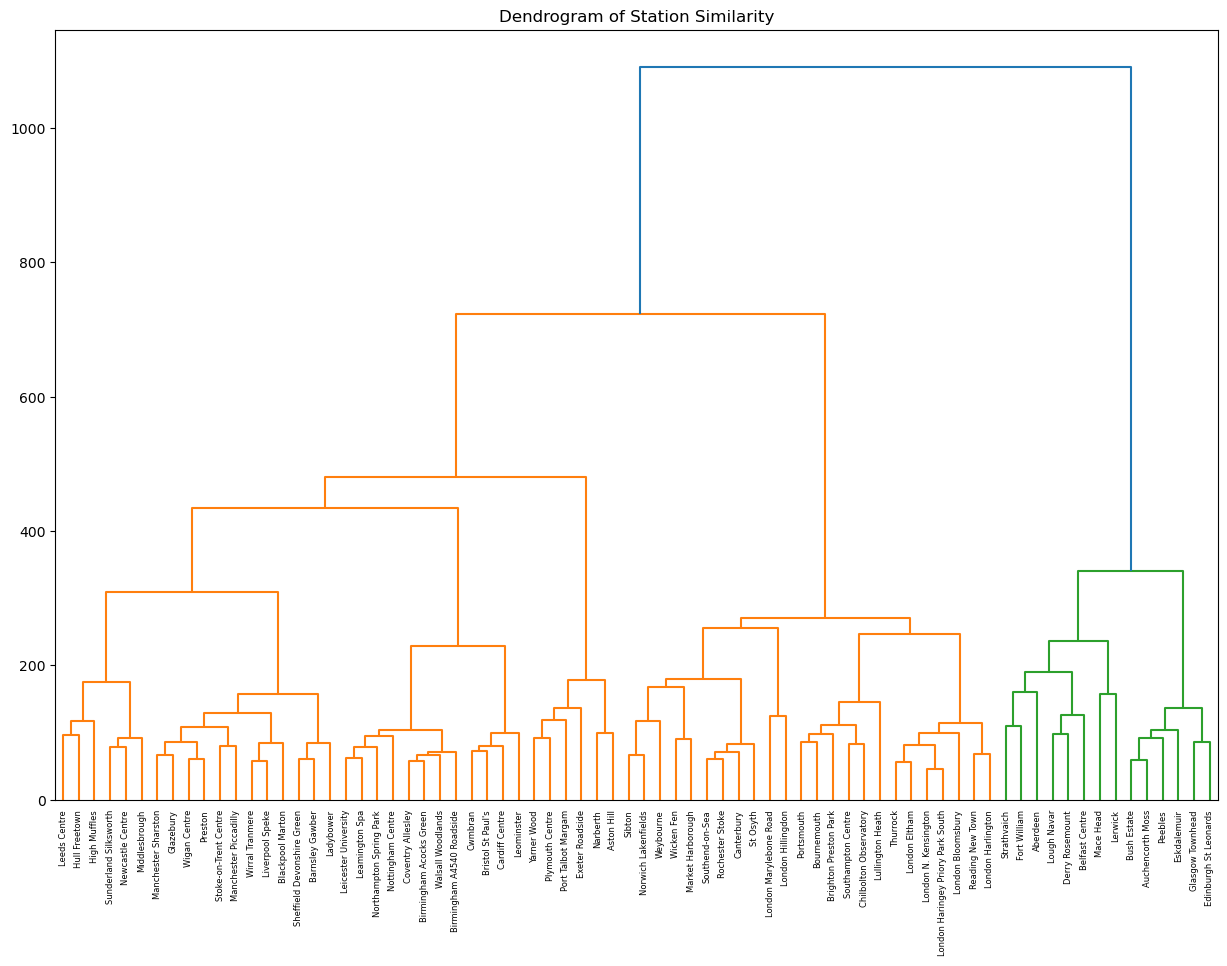

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform


linked = linkage(distance_o3,'ward')

plt.figure(figsize=(15,10))
dendrogram(linked, labels = o3_df.T.columns, orientation = 'top', distance_sort = 'descending', show_leaf_counts=True)
plt.title('Dendrogram of Station Similarity')
plt.show()

/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

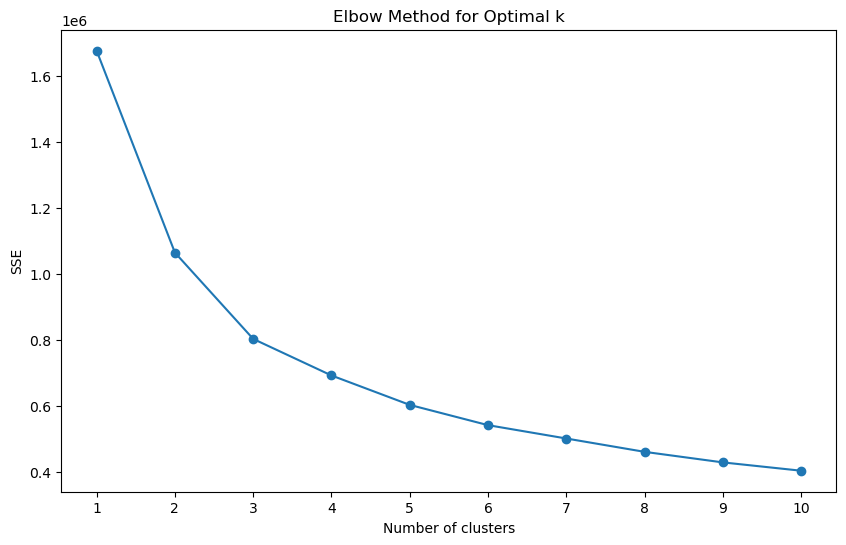

In [42]:

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(distance_o3)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

/var/folders/0m/gd25hz5n0txcvvd5vlf0vbzh0000gn/T/ipykernel_45879/2864210906.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_pm10,'ward')


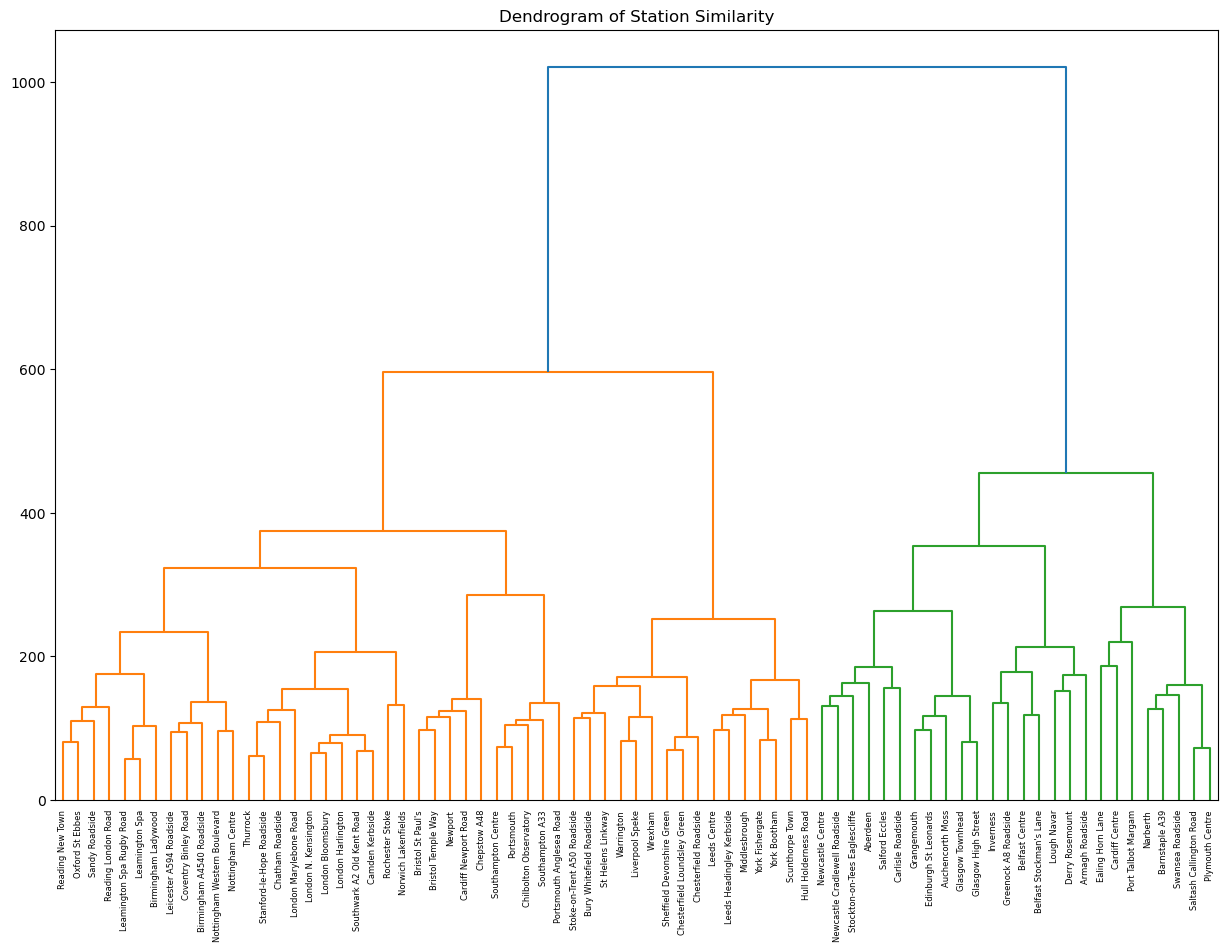

In [43]:

linked = linkage(distance_pm10,'ward')

plt.figure(figsize=(15,10))
dendrogram(linked, labels = pm10_df.T.columns, orientation = 'top', distance_sort = 'descending', show_leaf_counts=True)
plt.title('Dendrogram of Station Similarity')
plt.show()

/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

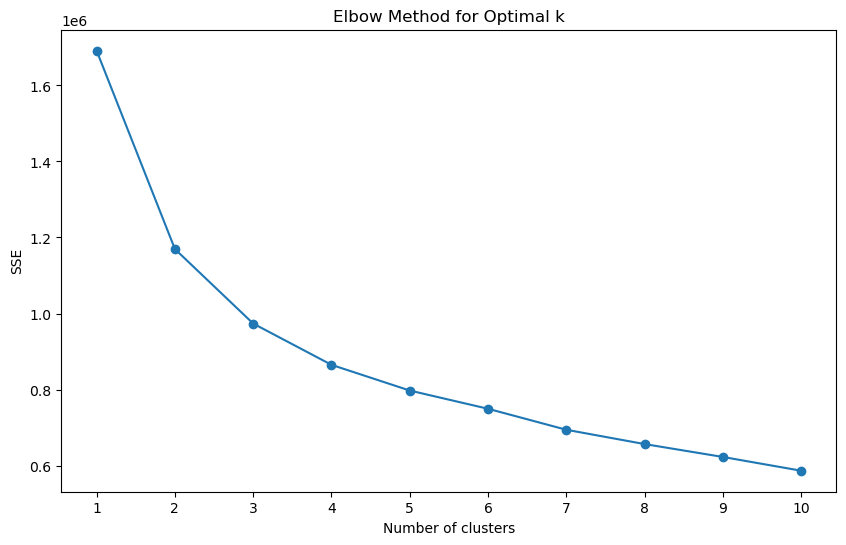

In [44]:

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(distance_pm10)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

/var/folders/0m/gd25hz5n0txcvvd5vlf0vbzh0000gn/T/ipykernel_45879/3563214695.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_pm25,'ward')


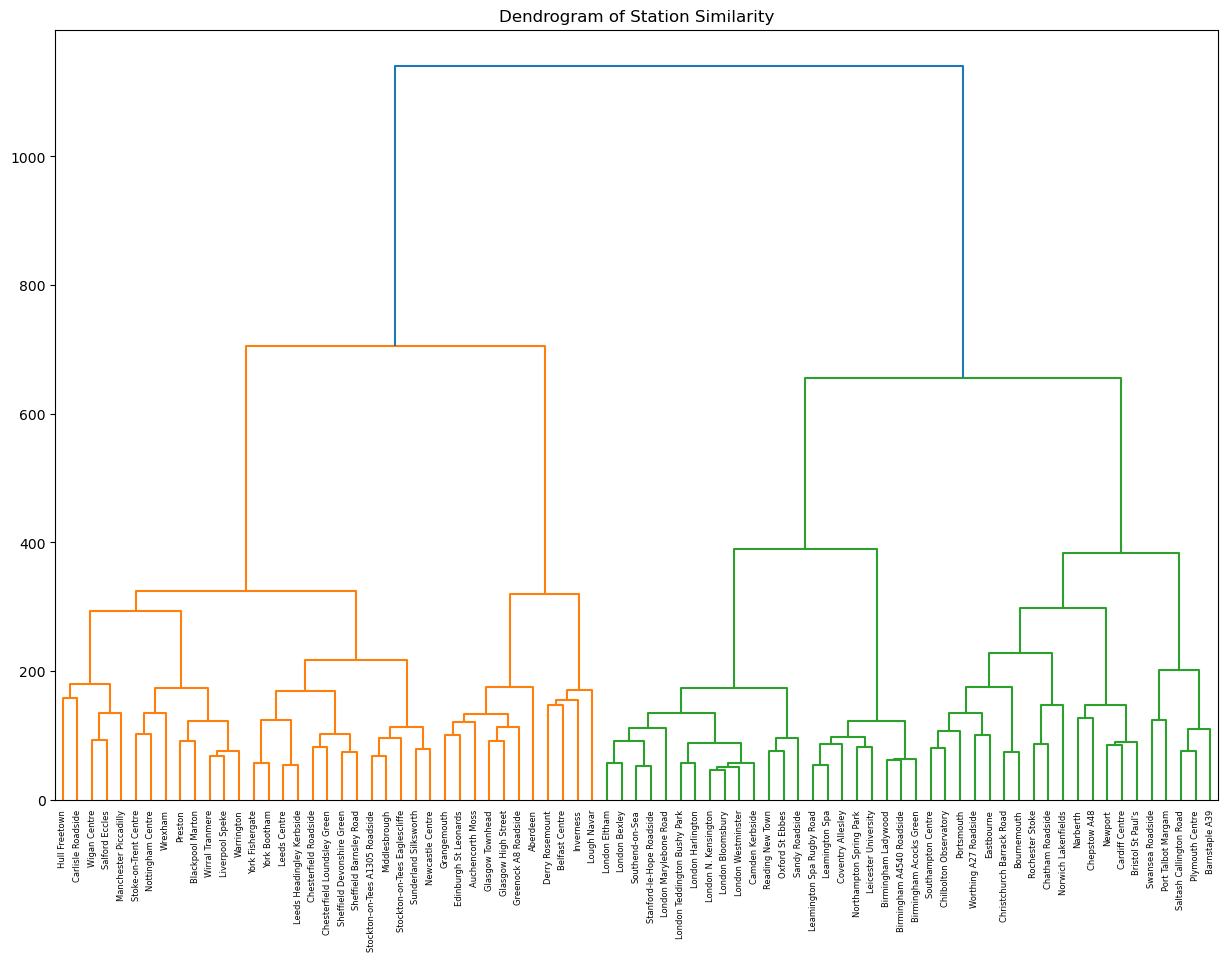

In [45]:

#Hierarchical clustering using linkage
linked = linkage(distance_pm25,'ward')

plt.figure(figsize=(15,10))
dendrogram(linked, labels = pm25_df.T.columns, orientation = 'top', distance_sort = 'descending', show_leaf_counts=True)
plt.title('Dendrogram of Station Similarity')
plt.show()

/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

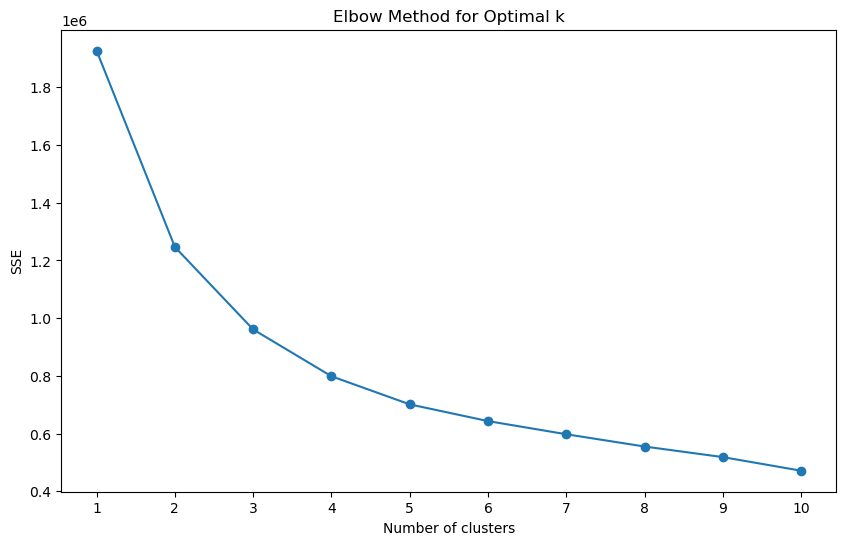

In [46]:
# Use elbow rule to determine optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(distance_pm25)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

In [47]:
test

source         site code                      date        nox  \
0         aurn     Aberdeen  ABD 2018-01-01 00:00:00+00:00  24.788050   
1         aurn     Aberdeen  ABD 2018-01-01 01:00:00+00:00  27.525390   
2         aurn     Aberdeen  ABD 2018-01-01 02:00:00+00:00  26.631950   
3         aurn     Aberdeen  ABD 2018-01-01 03:00:00+00:00  32.334720   
4         aurn     Aberdeen  ABD 2018-01-01 04:00:00+00:00 101.167190   
...        ...          ...  ...                       ...        ...   
1472635   aurn  Yarner Wood   YW 2018-12-31 19:00:00+00:00   1.456910   
1472636   aurn  Yarner Wood   YW 2018-12-31 20:00:00+00:00   1.909050   
1472637   aurn  Yarner Wood   YW 2018-12-31 21:00:00+00:00   1.507150   
1472638   aurn  Yarner Wood   YW 2018-12-31 22:00:00+00:00   1.255950   
1472639   aurn  Yarner Wood   YW 2018-12-31 23:00:00+00:00   1.155480   

              no2        no        o3     pm10    pm2.5  ...         wd  \
0       20.358920  2.888610 58.806630 6.700000 7.900000  ... 259.700000   
1       23.168860  2.841250 52.952570 3.900000 6.700000  ... 275.700000   
2       22.602160  2.628160 52.736370 2.000000 4.500000  ... 275.900000   
3       28.958420  2.201970 39.714430 4.400000 2.700000  ... 262.300000   
4       75.790430 16.550300  3.492480 8.000000 6.700000  ... 260.400000   
...           ...       ...       ...      ...      ...  ...        ...   
1472635  1.051830  0.264180 57.925190      NaN      NaN  ... 293.000000   
1472636  1.453340  0.297210 57.975090      NaN      NaN  ... 294.700000   
1472637  1.051440  0.297210 64.161760      NaN      NaN  ... 294.700000   
1472638  0.901510  0.231160 66.157460      NaN      NaN  ... 299.400000   
1472639  0.649140  0.330230 68.652080      NaN      NaN  ... 305.700000   

         air_temp  so2  co  year  month  day         site_type  latitude  \
0        2.200000  NaN NaN  2018      1    1  Urban Background 57.157360   
1        2.800000  NaN NaN  2018      1    1  Urban Background 57.157360   
2        3.100000  NaN NaN  2018      1    1  Urban Background 57.157360   
3        1.900000  NaN NaN  2018      1    1  Urban Background 57.157360   
4        1.100000  NaN NaN  2018      1    1  Urban Background 57.157360   
...           ...  ...  ..   ...    ...  ...               ...       ...   
1472635  6.100000  NaN NaN  2018     12   31  Rural Background 50.597600   
1472636  6.000000  NaN NaN  2018     12   31  Rural Background 50.597600   
1472637  6.100000  NaN NaN  2018     12   31  Rural Background 50.597600   
1472638  6.300000  NaN NaN  2018     12   31  Rural Background 50.597600   
1472639  6.600000  NaN NaN  2018     12   31  Rural Background 50.597600   

         longitude  
0        -2.094278  
1        -2.094278  
2        -2.094278  
3        -2.094278  
4        -2.094278  
...            ...  
1472635  -3.716510  
1472636  -3.716510  
1472637  -3.716510  
1472638  -3.716510  
1472639  -3.716510  

[1445640 rows x 25 columns]

In [48]:
# Location of missing values for contaminants in raw data
missing_mask = test[pollutants].isnull()
missing_mask

no2     o3   pm10  pm2.5
0        False  False  False  False
1        False  False  False  False
2        False  False  False  False
3        False  False  False  False
4        False  False  False  False
...        ...    ...    ...    ...
1472635  False  False   True   True
1472636  False  False   True   True
1472637  False  False   True   True
1472638  False  False   True   True
1472639  False  False   True   True

[1445640 rows x 4 columns]

In [49]:
len(test['site'].unique())

166

### Kmeans clustering

#### For the No2 dataset

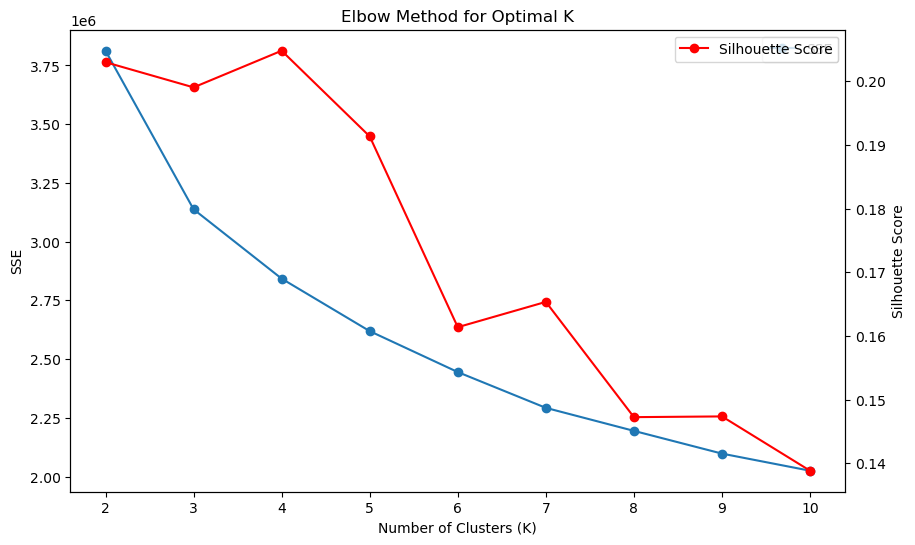

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sse = [] 
silhouette_scores = []  

K_values = range(2, 11)  

for k in K_values:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(distance_no2)
    sse.append(kmeans.inertia_)  
    labels = kmeans.predict(distance_no2)
    silhouette_avg = silhouette_score(distance_no2, labels)
    silhouette_scores.append(silhouette_avg)


fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.plot(K_values, sse, marker='o', label='SSE')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('SSE')
ax1.set_title('Elbow Method for Optimal K')
ax1.legend(loc='best')


ax2 = ax1.twinx()
ax2.plot(K_values, silhouette_scores, marker='o', color='r', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score')
ax2.legend(loc='best')

plt.show()

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

no2_kmeans = KMeans(n_clusters=4,random_state=42).fit(distance_no2)
no2_labels = no2_kmeans.labels_

/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [53]:
len(no2_labels)

154

In [54]:
# Calculate silhouette score for No2 clustering
silhouette_no2 = silhouette_score(distance_no2,no2_labels)
print(f'silhouette score for No2 clustering:{silhouette_no2}')

silhouette score for No2 clustering:0.20480312466073178


In [55]:
# Combine site names and corresponding cluster labels into a DataFrame
clustered_no2 = pd.DataFrame({
    'site': no2_df.index,
    'cluster': no2_labels
})

# Extract latitude and longitude information from each station in the original dataset
site_location = test[['site', 'latitude', 'longitude']].drop_duplicates()

# Merge latitude and longitude information with clustering results
clustered_no2 = clustered_no2.merge(site_location, on='site', how='left')
clustered_no2

site  cluster  latitude  longitude
0                          Aberdeen        2 57.157360  -2.094278
1    Aberdeen Union Street Roadside        2 57.144555  -2.106472
2          Aberdeen Wellington Road        2 57.133888  -2.094198
3           Birmingham Acocks Green        1 52.437165  -1.829999
4                        Aston Hill        0 52.503850  -3.034178
..                              ...      ...       ...        ...
149                         Wrexham        1 53.042282  -3.002829
150           Worthing A27 Roadside        2 50.832947  -0.379916
151                    York Bootham        1 53.967513  -1.086514
152                 York Fishergate        1 53.951889  -1.075861
153                     Yarner Wood        0 50.597600  -3.716510

[154 rows x 4 columns]

In [56]:
import folium

# Select the centre of the map as the midpoint of the latitude and longitude of all stations
map_center = [clustered_no2['latitude'].mean(), clustered_no2['longitude'].mean()]

# Create a map object
m = folium.Map(location=map_center, zoom_start=6)

# Add a marker to each site and use different colours to indicate different clusters
colors = ['red', 'blue', 'green', 'purple'] 
for idx, row in clustered_no2.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=colors[row['cluster']],
        fill=True,
        fill_color=colors[row['cluster']],
        fill_opacity=0.6,
        popup=row['site']
    ).add_to(m)

# 显示地图
m

#### for the O3 dataset

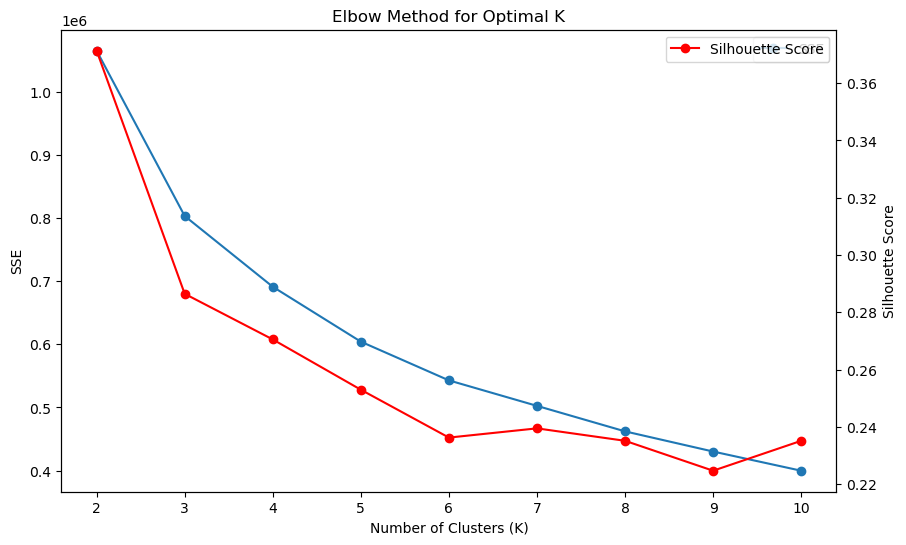

In [57]:
sse = []  # Store the SSE for each K value
silhouette_scores = []  # Store the profile coefficients for each K value

K_values = range(2, 11)  # Range of K values

for k in K_values:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(distance_o3)
    sse.append(kmeans.inertia_)  # Calculate SSE
    labels = kmeans.predict(distance_o3)
    silhouette_avg = silhouette_score(distance_o3, labels)
    silhouette_scores.append(silhouette_avg)

# 3. Mapping of elbows and contour coefficients
fig, ax1 = plt.subplots(figsize=(10, 6))

# Elbow Chart (SSE)
ax1.plot(K_values, sse, marker='o', label='SSE')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('SSE')
ax1.set_title('Elbow Method for Optimal K')
ax1.legend(loc='best')


ax2 = ax1.twinx()
ax2.plot(K_values, silhouette_scores, marker='o', color='r', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score')
ax2.legend(loc='best')

plt.show()

In [58]:
o3_kmeans = KMeans(n_clusters=2,random_state=42).fit(distance_o3)
o3_labels = o3_kmeans.labels_

/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [59]:

silhouette_o3 = silhouette_score(distance_o3,o3_labels)
print(f'silhouette score for O3 clustering:{silhouette_o3}')

silhouette score for O3 clustering:0.3713027659340143


In [60]:

clustered_o3 = pd.DataFrame({
    'site': o3_df.index,
    'cluster': o3_labels
})



clustered_o3 = clustered_o3.merge(site_location, on='site', how='left')
clustered_o3

site  cluster  latitude  longitude
0                  Aberdeen        1 57.157360  -2.094278
1          Auchencorth Moss        1 55.792160  -3.242900
2   Birmingham Acocks Green        0 52.437165  -1.829999
3                Aston Hill        0 52.503850  -3.034178
4           Barnsley Gawber        0 53.562920  -1.510436
..                      ...      ...       ...        ...
69        Walsall Woodlands        0 52.605641  -2.030371
70                Weybourne        0 52.950490   1.122017
71               Wicken Fen        0 52.298500   0.290917
72             Wigan Centre        0 53.549140  -2.638139
73              Yarner Wood        0 50.597600  -3.716510

[74 rows x 4 columns]

In [61]:
import folium

# 选择地图的中心点为所有站点经纬度的中点
map_center = [clustered_o3['latitude'].mean(), clustered_o3['longitude'].mean()]

# 创建一个地图对象
m = folium.Map(location=map_center, zoom_start=6)

# 为每个站点添加一个标记，并用不同颜色表示不同的簇
colors = ['red', 'blue', 'green'] 
for idx, row in clustered_o3.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=colors[row['cluster']],
        fill=True,
        fill_color=colors[row['cluster']],
        fill_opacity=0.6,
        popup=row['site']
    ).add_to(m)

# 显示地图
m

#### for pm10 dataset

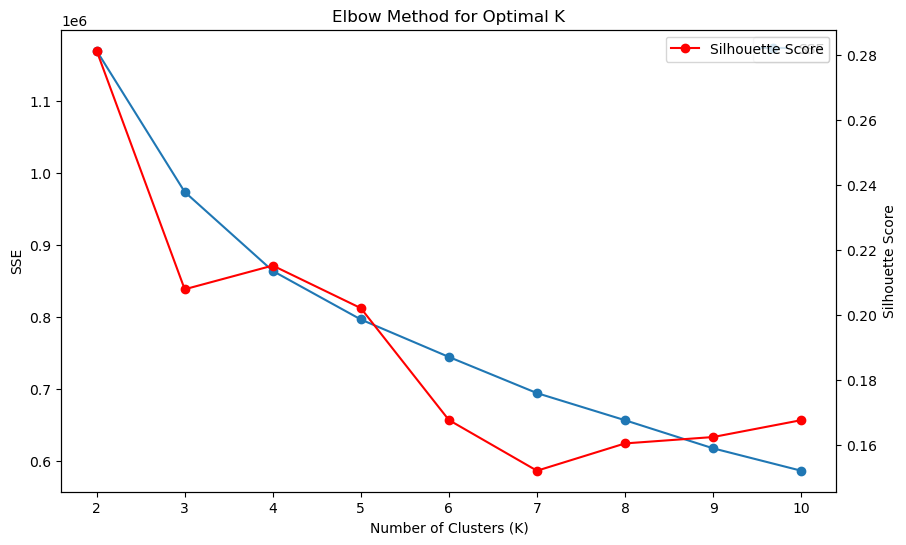

In [62]:
sse = []  # 存储每个K值的SSE
silhouette_scores = []  # 存储每个K值的轮廓系数

K_values = range(2, 11)  # K值的范围

for k in K_values:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(distance_pm10)
    sse.append(kmeans.inertia_)  # 计算SSE
    labels = kmeans.predict(distance_pm10)
    silhouette_avg = silhouette_score(distance_pm10, labels)
    silhouette_scores.append(silhouette_avg)

# 3. 绘制肘部图和轮廓系数
fig, ax1 = plt.subplots(figsize=(10, 6))

# 肘部图 (SSE)
ax1.plot(K_values, sse, marker='o', label='SSE')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('SSE')
ax1.set_title('Elbow Method for Optimal K')
ax1.legend(loc='best')

# 轮廓系数图
ax2 = ax1.twinx()
ax2.plot(K_values, silhouette_scores, marker='o', color='r', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score')
ax2.legend(loc='best')

plt.show()

In [63]:
pm10_kmeans = KMeans(n_clusters=2,random_state=42).fit(distance_pm10)
pm10_labels = pm10_kmeans.labels_

/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [64]:
#计算No2聚类的轮廓系数
silhouette_pm10 = silhouette_score(distance_pm10,pm10_labels)
print(f'silhouette score for PM10 clustering:{silhouette_pm10}')

silhouette score for PM10 clustering:0.28128831908918617


In [65]:
# 将站点名称和对应的聚类标签合并为一个 DataFrame
clustered_pm10 = pd.DataFrame({
    'site': pm10_df.index,
    'cluster': pm10_labels
})


# 将经纬度信息与聚类结果合并
clustered_pm10 = clustered_pm10.merge(site_location, on='site', how='left')
clustered_pm10

site  cluster  latitude  longitude
0                  Aberdeen        0 57.157360  -2.094278
1          Auchencorth Moss        0 55.792160  -3.242900
2           Armagh Roadside        0 54.353728  -6.654558
3   Belfast Stockman's Lane        0 54.572586  -5.974944
4            Belfast Centre        0 54.599650  -5.928833
..                      ...      ...       ...        ...
70                 Thurrock        1 51.477070   0.317969
71               Warrington        1 53.389225  -2.615593
72                  Wrexham        1 53.042282  -3.002829
73             York Bootham        1 53.967513  -1.086514
74          York Fishergate        1 53.951889  -1.075861

[75 rows x 4 columns]

In [66]:
import folium

# 选择地图的中心点为所有站点经纬度的中点
map_center = [clustered_pm10['latitude'].mean(), clustered_pm10['longitude'].mean()]

# 创建一个地图对象
m = folium.Map(location=map_center, zoom_start=6)

# 为每个站点添加一个标记，并用不同颜色表示不同的簇
colors = ['red', 'blue', 'green'] 
for idx, row in clustered_pm10.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=colors[row['cluster']],
        fill=True,
        fill_color=colors[row['cluster']],
        fill_opacity=0.6,
        popup=row['site']
    ).add_to(m)

# 显示地图
m

In [67]:
#### For the Pm25 dataset

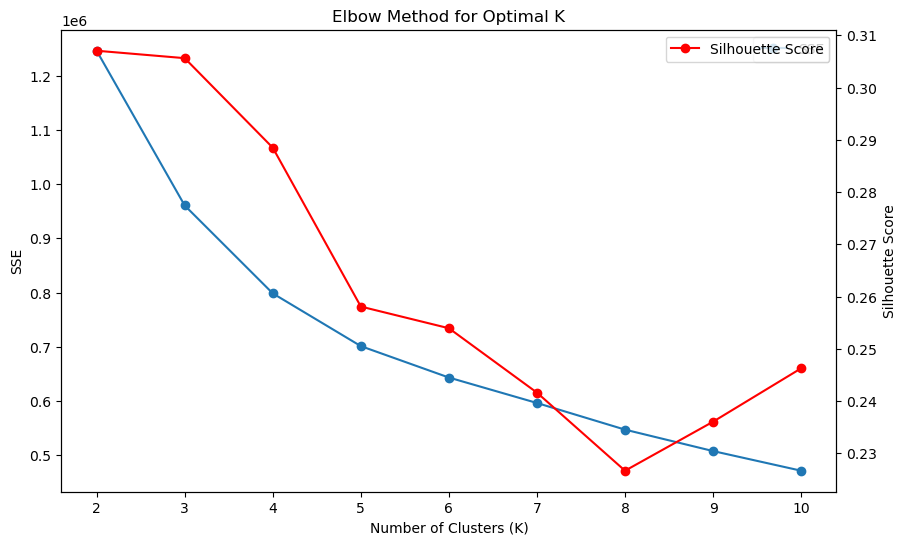

In [68]:
sse = []  # 存储每个K值的SSE
silhouette_scores = []  # 存储每个K值的轮廓系数

K_values = range(2, 11)  # K值的范围

for k in K_values:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(distance_pm25)
    sse.append(kmeans.inertia_)  # 计算SSE
    labels = kmeans.predict(distance_pm25)
    silhouette_avg = silhouette_score(distance_pm25, labels)
    silhouette_scores.append(silhouette_avg)

# 3. 绘制肘部图和轮廓系数
fig, ax1 = plt.subplots(figsize=(10, 6))

# 肘部图 (SSE)
ax1.plot(K_values, sse, marker='o', label='SSE')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('SSE')
ax1.set_title('Elbow Method for Optimal K')
ax1.legend(loc='best')

# 轮廓系数图
ax2 = ax1.twinx()
ax2.plot(K_values, silhouette_scores, marker='o', color='r', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score')
ax2.legend(loc='best')

plt.show()

In [69]:
pm25_kmeans = KMeans(n_clusters=2,random_state=42).fit(distance_pm25)
pm25_labels = pm25_kmeans.labels_

/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [70]:
#计算No2聚类的轮廓系数
silhouette_pm25 = silhouette_score(distance_pm25,pm25_labels)
print(f'silhouette score of the pm25 clustering:{silhouette_pm25}')

silhouette score of the pm25 clustering:0.30704016985366006


In [71]:
# 将站点名称和对应的聚类标签合并为一个 DataFrame
clustered_pm25 = pd.DataFrame({
    'site': pm25_df.index,
    'cluster': pm25_labels
})

# 将原数据集中每个站点的经纬度信息提取出来
site_location = test[['site', 'latitude', 'longitude']].drop_duplicates()

# 将经纬度信息与聚类结果合并
clustered_pm25 = clustered_pm25.merge(site_location, on='site', how='left')
clustered_pm25

site  cluster  latitude  longitude
0                  Aberdeen        0 57.157360  -2.094278
1          Auchencorth Moss        0 55.792160  -3.242900
2   Birmingham Acocks Green        1 52.437165  -1.829999
3            Belfast Centre        0 54.599650  -5.928833
4             London Bexley        1 51.466030   0.184806
..                      ...      ...       ...        ...
74             Wigan Centre        0 53.549140  -2.638139
75                  Wrexham        1 53.042282  -3.002829
76    Worthing A27 Roadside        1 50.832947  -0.379916
77             York Bootham        0 53.967513  -1.086514
78          York Fishergate        0 53.951889  -1.075861

[79 rows x 4 columns]

In [72]:
import folium

# 选择地图的中心点为所有站点经纬度的中点
map_center = [clustered_pm25['latitude'].mean(), clustered_pm25['longitude'].mean()]

# 创建一个地图对象
m = folium.Map(location=map_center, zoom_start=6)

# 为每个站点添加一个标记，并用不同颜色表示不同的簇
colors = ['red', 'blue', 'green', 'purple'] 
for idx, row in clustered_pm25.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=colors[row['cluster']],
        fill=True,
        fill_color=colors[row['cluster']],
        fill_opacity=0.6,
        popup=row['site']
    ).add_to(m)

# 显示地图
m

# Multivariate clustering

## Initial clustering of sites where all major pollutants are recorded

In [73]:
# Find sites with records for all four pollutants
combined_sites = pm25_df.index
for df in [no2_df, o3_df, pm10_df]:
    combined_sites = combined_sites.intersection(df.index)

combined_sites


CategoricalIndex(['Aberdeen', 'Belfast Centre', 'Birmingham A4540 Roadside',
                  'Bristol St Paul's', 'Cardiff Centre',
                  'Chilbolton Observatory', 'London Bloomsbury',
                  'Derry Rosemount', 'Edinburgh St Leonards',
                  'Glasgow Townhead', 'London Harlington',
                  'London N. Kensington', 'Leamington Spa', 'Leeds Centre',
                  'Liverpool Speke', 'Middlesbrough', 'London Marylebone Road',
                  'Newcastle Centre', 'Norwich Lakenfields',
                  'Nottingham Centre', 'Narberth', 'Plymouth Centre',
                  'Portsmouth', 'Port Talbot Margam', 'Reading New Town',
                  'Rochester Stoke', 'Sheffield Devonshire Green',
                  'Southampton Centre'],
                 categories=['Aberdeen', 'Aberdeen Union Street Roadside', 'Aberdeen Wellington Road', 'Armagh Roadside', ..., 'Wrexham', 'Yarner Wood', 'York Bootham', 'York Fishergate'], ordered=False, dtype='

In [74]:
len(combined_sites)

28

In [75]:
# Retain sites that are present in all datasets
pm25_df_filtered = pm25_df.loc[combined_sites]
no2_df_filtered = no2_df.loc[combined_sites]
o3_df_filtered = o3_df.loc[combined_sites]
pm10_df_filtered = pm10_df.loc[combined_sites]

In [76]:
distance_pm252 = squareform(pdist(pm25_df_filtered, metric='euclidean'))
distance_no22 = squareform(pdist(no2_df_filtered, metric='euclidean'))
distance_o32 = squareform(pdist(o3_df_filtered, metric='euclidean'))
distance_pm102 = squareform(pdist(pm10_df_filtered, metric='euclidean'))

# Find the mean of the distance matrix
distance_multivariate = np.mean([distance_pm252, distance_no22, distance_o32, distance_pm102], axis=0)
distance_multivariate

array([[  0.        , 106.10128861, 105.78427456, 110.55330463,
        111.41162957, 113.73999103, 110.7737228 , 113.10928311,
         90.36051098,  93.97713598, 109.5930273 , 109.27541102,
        103.7253939 ,  96.29977591, 105.5079719 ,  97.19911359,
        112.08565536,  91.05747886, 104.52131062, 102.27836927,
        113.35667762, 112.58982326, 113.01452923, 113.96538905,
        109.58760807, 112.66509291, 102.47708801, 110.04053859],
       [106.10128861,   0.        , 103.47148536, 107.17016138,
        107.54680533, 115.02435633, 111.53621992,  89.16789979,
         96.48480207,  88.22552953, 111.05508895, 110.83567632,
        104.72533255, 100.77423485,  98.98862952,  99.91494414,
        115.80649544,  99.19446814, 111.15952206, 102.59291158,
        112.08955936, 110.66443366, 115.4562686 , 113.71781885,
        110.9539121 , 116.87946958, 101.39868948, 111.85536618],
       [105.78427456, 103.47148536,   0.        ,  73.99896907,
         84.20857985,  86.33587314,  8

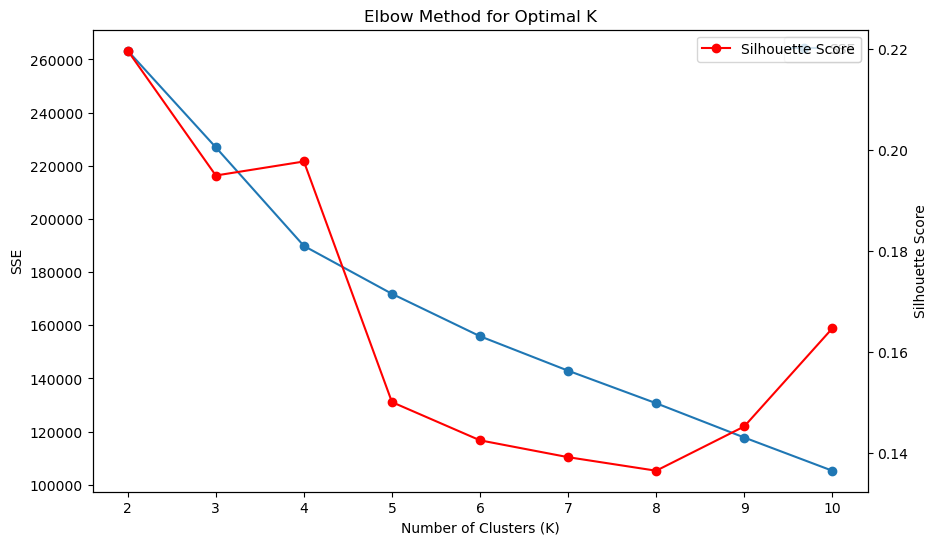

In [77]:
sse = []  # 存储每个K值的SSE
silhouette_scores = []  # 存储每个K值的轮廓系数

K_values = range(2, 11)  # K值的范围

for k in K_values:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(distance_multivariate)
    sse.append(kmeans.inertia_)  # 计算SSE
    labels = kmeans.predict(distance_multivariate)
    silhouette_avg = silhouette_score(distance_multivariate, labels)
    silhouette_scores.append(silhouette_avg)

# 3. 绘制肘部图和轮廓系数
fig, ax1 = plt.subplots(figsize=(10, 6))

# 肘部图 (SSE)
ax1.plot(K_values, sse, marker='o', label='SSE')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('SSE')
ax1.set_title('Elbow Method for Optimal K')
ax1.legend(loc='best')

# 轮廓系数图
ax2 = ax1.twinx()
ax2.plot(K_values, silhouette_scores, marker='o', color='r', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score')
ax2.legend(loc='best')

plt.show()

In [78]:
# 基于距离矩阵进行KMeans聚类
combined_kmeans = KMeans(n_clusters=2, random_state=42).fit(distance_multivariate)
combined_labels = combined_kmeans.labels_

/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [79]:
len(combined_labels)

28

In [80]:
# Calculate silhouette score for multivariate clustering
silhouette_combined = silhouette_score(distance_multivariate,combined_labels)
print(f'silhouette score for multivariate clustering:{silhouette_combined}')

silhouette score for multivariate clustering:0.21958658035283235


In [81]:
# Create an empty DataFrame that holds the clustering results
clustered_data = pd.DataFrame(columns=['cluster'], index=combined_sites)

# First add the clustering labels of the shared sites to clustered_data
clustered_data['cluster'].loc[combined_sites] = combined_labels
clustered_data

/var/folders/0m/gd25hz5n0txcvvd5vlf0vbzh0000gn/T/ipykernel_45879/788305471.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  clustered_data['cluster'].loc[combined_sites] = combined_labels


cluster
site                              
Aberdeen                         1
Belfast Centre                   1
Birmingham A4540 Roadside        0
Bristol St Paul's                0
Cardiff Centre                   0
Chilbolton Observatory           0
London Bloomsbury                0
Derry Rosemount                  1
Edinburgh St Leonards            1
Glasgow Townhead                 1
London Harlington                0
London N. Kensington             0
Leamington Spa                   0
Leeds Centre                     1
Liverpool Speke                  1
Middlesbrough                    1
London Marylebone Road           0
Newcastle Centre                 1
Norwich Lakenfields              0
Nottingham Centre                0
Narberth                         1
Plymouth Centre                  1
Portsmouth                       0
Port Talbot Margam               1
Reading New Town                 0
Rochester Stoke                  0
Sheffield Devonshire Green       1
Southampton Centre               0

In [82]:
import numpy as np

# For each cluster, calculate the centroid
cluster_centers = {}
for cluster_id in np.unique(combined_labels):
    # Get the sites that belong to the cluster
    cluster_sites = clustered_data.index[combined_labels == cluster_id]
    
    # Calculate the mean value for each pollutant as the centre of the cluster
    center_pm25 = pm25_df_filtered.loc[cluster_sites].mean(axis=0)
    center_no2 = no2_df_filtered.loc[cluster_sites].mean(axis=0)
    center_o3 = o3_df_filtered.loc[cluster_sites].mean(axis=0)
    center_pm10 = pm10_df_filtered.loc[cluster_sites].mean(axis=0)
    
    # Store these centre points in a dictionary
    cluster_centers[cluster_id] = {
        'pm25': center_pm25,
        'no2': center_no2,
        'o3': center_o3,
        'pm10': center_pm10
    }

In [83]:
cluster_centers

{0: {'pm25': date
  2018-01-01 00:00:00+00:00   -0.269973
  2018-01-01 01:00:00+00:00   -0.719899
  2018-01-01 02:00:00+00:00   -0.782987
  2018-01-01 03:00:00+00:00   -1.041914
  2018-01-01 04:00:00+00:00   -0.872464
                                 ...   
  2018-12-31 19:00:00+00:00   -0.159566
  2018-12-31 20:00:00+00:00   -0.149413
  2018-12-31 21:00:00+00:00   -0.121075
  2018-12-31 22:00:00+00:00   -0.207562
  2018-12-31 23:00:00+00:00   -0.215254
  Length: 8760, dtype: float64,
  'no2': date
  2018-01-01 00:00:00+00:00   -0.816210
  2018-01-01 01:00:00+00:00   -0.783490
  2018-01-01 02:00:00+00:00   -0.824432
  2018-01-01 03:00:00+00:00   -0.888011
  2018-01-01 04:00:00+00:00   -0.922374
                                 ...   
  2018-12-31 19:00:00+00:00   -0.267518
  2018-12-31 20:00:00+00:00   -0.387465
  2018-12-31 21:00:00+00:00   -0.467889
  2018-12-31 22:00:00+00:00   -0.642150
  2018-12-31 23:00:00+00:00   -0.717636
  Length: 8760, dtype: float64,
  'o3': date
  2018-01-0

In [84]:
# Assign non-shared sites to individual clusters
def assign_to_cluster(site, pm25_df, no2_df, o3_df, pm10_df, cluster_centers):
    min_distance = float('inf')
    assigned_cluster = None
    
    # Check in which contaminant datasets the site exists
    available_data = {
        'pm25': site in pm25_df.index,
        'no2': site in no2_df.index,
        'o3': site in o3_df.index,
        'pm10': site in pm10_df.index
    }
    
    # Calculate the distance of each cluster and find the closest cluster
    for cluster_id, centers in cluster_centers.items():
        # Initialise distance to 0
        distance = 0
        count = 0
        
        # For pollutants for which data exist, calculate Euclidean distance
        if available_data['pm25']:
            distance += np.linalg.norm(pm25_df.loc[site] - centers['pm25'])
            count += 1
        if available_data['no2']:
            distance += np.linalg.norm(no2_df.loc[site] - centers['no2'])
            count += 1
        if available_data['o3']:
            distance += np.linalg.norm(o3_df.loc[site] - centers['o3'])
            count += 1
        if available_data['pm10']:
            distance += np.linalg.norm(pm10_df.loc[site] - centers['pm10'])
            count += 1
        
        # Calculate the average distance
        if count > 0:
            avg_distance = distance / count
            if avg_distance < min_distance:
                min_distance = avg_distance
                assigned_cluster = cluster_id
    
    return assigned_cluster



In [85]:
# Get an index of all datasets
all_sites = pd.Index(pm25_df.index).union(no2_df.index).union(o3_df.index).union(pm10_df.index)

# Find indexes that are not in combined_sites
non_common_sites = all_sites.difference(combined_sites)


In [86]:
non_common_sites

CategoricalIndex(['Aberdeen Union Street Roadside', 'Aberdeen Wellington Road',
                  'Armagh Roadside', 'Aston Hill', 'Auchencorth Moss',
                  'Ballymena Antrim Road', 'Ballymena Ballykeel',
                  'Barnsley Gawber', 'Barnstaple A39', 'Bath Roadside',
                  ...
                  'Warrington', 'Weybourne', 'Wicken Fen', 'Wigan Centre',
                  'Wirral Tranmere', 'Worthing A27 Roadside', 'Wrexham',
                  'Yarner Wood', 'York Bootham', 'York Fishergate'],
                 categories=['Aberdeen', 'Aberdeen Union Street Roadside', 'Aberdeen Wellington Road', 'Armagh Roadside', ..., 'Wrexham', 'Yarner Wood', 'York Bootham', 'York Fishergate'], ordered=False, dtype='category', name='site', length=138)

In [87]:
# Handling of non-shared sites
site_clusters = {}

for site in non_common_sites:
    site_clusters[site] = assign_to_cluster(site, pm25_df, no2_df, o3_df, pm10_df, cluster_centers)

site_clusters

{'Aberdeen Union Street Roadside': 1,
 'Aberdeen Wellington Road': 1,
 'Armagh Roadside': 1,
 'Aston Hill': 1,
 'Auchencorth Moss': 1,
 'Ballymena Antrim Road': 1,
 'Ballymena Ballykeel': 1,
 'Barnsley Gawber': 1,
 'Barnstaple A39': 1,
 'Bath Roadside': 1,
 "Belfast Stockman's Lane": 1,
 'Billingham': 1,
 'Birkenhead Borough Road': 1,
 'Birmingham Acocks Green': 0,
 'Birmingham Ladywood': 0,
 'Blackburn Accrington Road': 1,
 'Blackpool Marton': 1,
 'Borehamwood Meadow Park': 0,
 'Bournemouth': 0,
 'Bradford Mayo Avenue': 1,
 'Brighton Preston Park': 0,
 'Bristol Temple Way': 0,
 'Burton-on-Trent Horninglow': 0,
 'Bury Whitefield Roadside': 1,
 'Bush Estate': 1,
 'Cambridge Roadside': 0,
 'Camden Kerbside': 0,
 'Cannock A5190 Roadside': 0,
 'Canterbury': 0,
 'Cardiff Newport Road': 0,
 'Carlisle Roadside': 1,
 'Charlton Mackrell': 0,
 'Chatham Roadside': 0,
 'Chepstow A48': 0,
 'Chesterfield Loundsley Green': 1,
 'Chesterfield Roadside': 1,
 'Christchurch Barrack Road': 0,
 'Coventry Al

In [88]:
# Clustering results from non-shared sites merged into original clustering results
site_clusters = pd.DataFrame(list(site_clusters.items()), columns=['site', 'cluster'])
site_clusters.set_index('site', inplace=True)

clustered_data = pd.concat([clustered_data, site_clusters])
clustered_data

cluster
site                             
Aberdeen                        1
Belfast Centre                  1
Birmingham A4540 Roadside       0
Bristol St Paul's               0
Cardiff Centre                  0
...                           ...
Worthing A27 Roadside           0
Wrexham                         1
Yarner Wood                     1
York Bootham                    1
York Fishergate                 1

[166 rows x 1 columns]

In [89]:
# Merge latitude and longitude data
clustered_data = clustered_data.merge(site_location, on='site', how='left')

# Visualisation results
map_center = [clustered_data['latitude'].mean(), clustered_data['longitude'].mean()]

m = folium.Map(location=map_center, zoom_start=6)

colors = ['red', 'blue', 'green', 'purple']
for idx, row in clustered_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=colors[int(row['cluster'])],
        fill=True,
        fill_color=colors[int(row['cluster'])],
        fill_opacity=0.6,
        popup=row.name
    ).add_to(m)

m


In [90]:
clustered_data

site cluster  latitude  longitude
0                     Aberdeen       1 57.157360  -2.094278
1               Belfast Centre       1 54.599650  -5.928833
2    Birmingham A4540 Roadside       0 52.476145  -1.874978
3            Bristol St Paul's       0 51.462839  -2.584482
4               Cardiff Centre       0 51.481780  -3.176250
..                         ...     ...       ...        ...
161      Worthing A27 Roadside       0 50.832947  -0.379916
162                    Wrexham       1 53.042282  -3.002829
163                Yarner Wood       1 50.597600  -3.716510
164               York Bootham       1 53.967513  -1.086514
165            York Fishergate       1 53.951889  -1.075861

[166 rows x 4 columns]

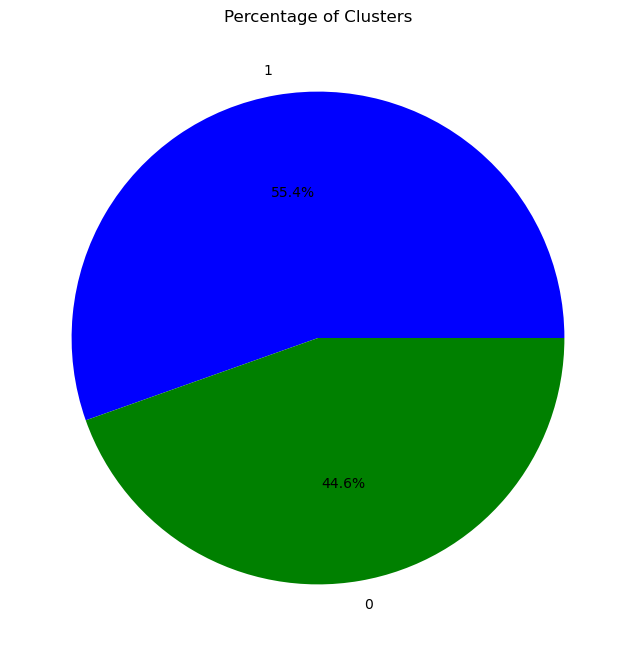

In [91]:
cluster_counts = clustered_data['cluster'].value_counts()
# Calculate the percentage of each cluster
cluster_percentages = cluster_counts / cluster_counts.sum() * 100
colors = [
    'blue', 'green', 'red', 'purple', 'darkred', 'darkblue', 
]

plt.figure(figsize=(10, 8))
plt.pie(cluster_percentages, labels=cluster_percentages.index, autopct='%1.1f%%', colors=colors[:len(cluster_percentages)])
plt.title('Percentage of Clusters')

plt.show()

# Missing values interpolated backwards using multivariate clustering results

In [92]:
clustered_data

site cluster  latitude  longitude
0                     Aberdeen       1 57.157360  -2.094278
1               Belfast Centre       1 54.599650  -5.928833
2    Birmingham A4540 Roadside       0 52.476145  -1.874978
3            Bristol St Paul's       0 51.462839  -2.584482
4               Cardiff Centre       0 51.481780  -3.176250
..                         ...     ...       ...        ...
161      Worthing A27 Roadside       0 50.832947  -0.379916
162                    Wrexham       1 53.042282  -3.002829
163                Yarner Wood       1 50.597600  -3.716510
164               York Bootham       1 53.967513  -1.086514
165            York Fishergate       1 53.951889  -1.075861

[166 rows x 4 columns]

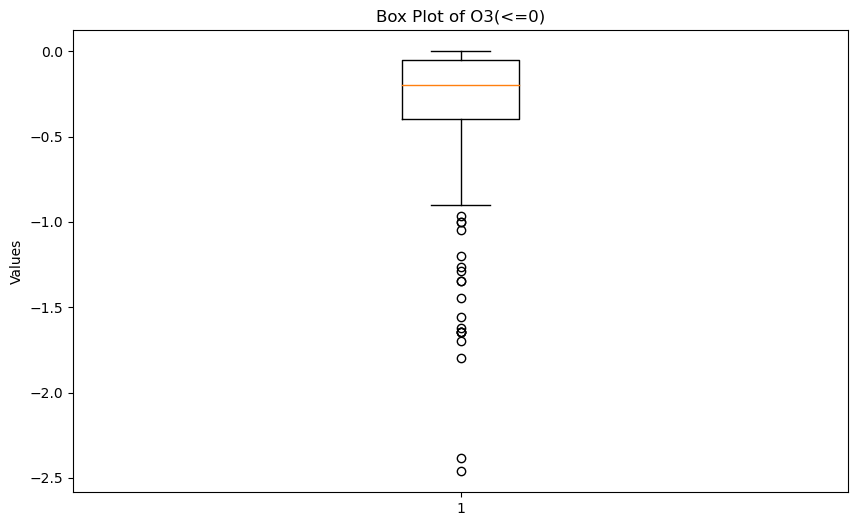

In [93]:
# Plotting box lines
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_data[filtered_data['o3'] <= 0]['o3'])
plt.title('Box Plot of O3(<=0)')
plt.ylabel('Values')
plt.show()

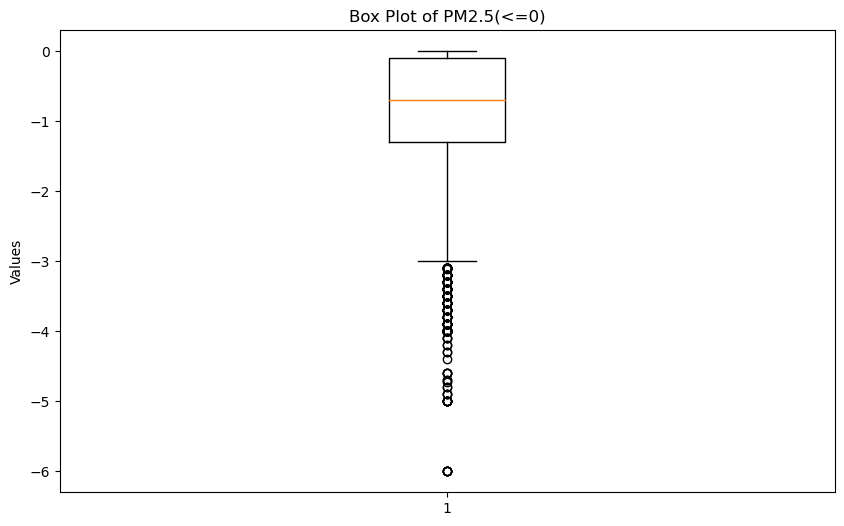

In [94]:
# 绘制箱线图
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_data[filtered_data['pm2.5'] <= 0]['pm2.5'])
plt.title('Box Plot of PM2.5(<=0)')
plt.ylabel('Values')
plt.show()

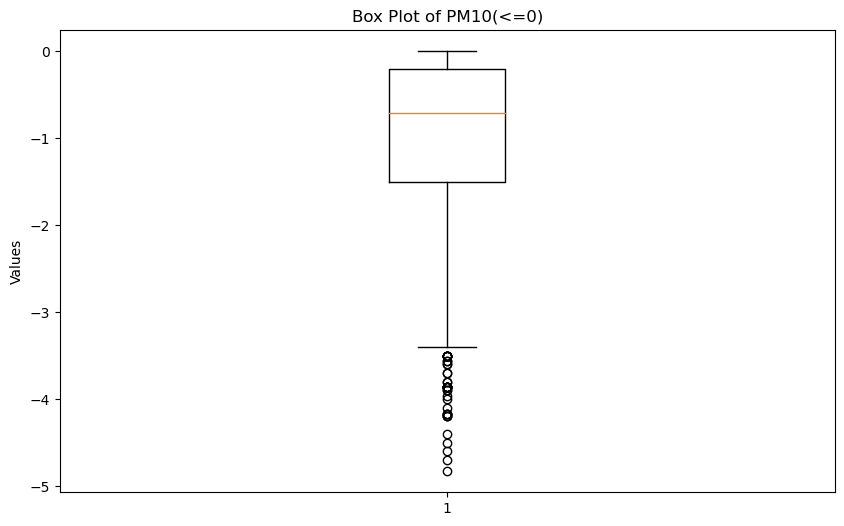

In [95]:
# 绘制箱线图
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_data[filtered_data['pm10'] <= 0]['pm10'])
plt.title('Box Plot of PM10(<=0)')
plt.ylabel('Values')
plt.show()

In [96]:
features2 = ['nox', 'no2','no','o3','pm10','pm2.5']
test[features2].isna().sum()

nox      160822
no2      160827
no       160169
o3       816115
pm10     873854
pm2.5    840048
dtype: int64

In [97]:
# Replace values less than 0 with their absolute values
test['nox'] = test['nox'].apply(lambda x: abs(x) if x < 0 else x)
test['no2'] = test['no2'].apply(lambda x: abs(x) if x < 0 else x)
test['no'] = test['no'].apply(lambda x: abs(x) if x < 0 else x)
test['o3'] = test['o3'].apply(lambda x: abs(x) if x < 0 else x)
test['pm2.5'] = test['pm2.5'].apply(lambda x: abs(x) if x < 0 else x)
test['pm10'] = test['pm10'].apply(lambda x: abs(x) if x < 0 else x)
test[features2] = test[features2].replace(0, np.nan)  # 先将0值替换为NaN
test[features2].isna().sum()

nox      160827
no2      160835
no       161511
o3       816147
pm10     874154
pm2.5    841490
dtype: int64

In [98]:
# Select feature columns
features = ['nox', 'no2', 'no', 'o3', 'pm10', 'pm2.5', 'ws', 'wd', 'air_temp']
means = test[features].mean()
stds = test[features].std()
means

nox         46.970540
no2         23.830092
no          15.103726
o3          50.263587
pm10        16.381200
pm2.5       10.039761
ws           4.646991
wd         194.165340
air_temp     9.216230
dtype: float64

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
test[features] = scaler.fit_transform(test[features])
test

source         site code                      date       nox  \
0         aurn     Aberdeen  ABD 2018-01-01 00:00:00+00:00 -0.329585   
1         aurn     Aberdeen  ABD 2018-01-01 01:00:00+00:00 -0.288914   
2         aurn     Aberdeen  ABD 2018-01-01 02:00:00+00:00 -0.302188   
3         aurn     Aberdeen  ABD 2018-01-01 03:00:00+00:00 -0.217457   
4         aurn     Aberdeen  ABD 2018-01-01 04:00:00+00:00  0.805247   
...        ...          ...  ...                       ...       ...   
1472635   aurn  Yarner Wood   YW 2018-12-31 19:00:00+00:00 -0.676236   
1472636   aurn  Yarner Wood   YW 2018-12-31 20:00:00+00:00 -0.669518   
1472637   aurn  Yarner Wood   YW 2018-12-31 21:00:00+00:00 -0.675490   
1472638   aurn  Yarner Wood   YW 2018-12-31 22:00:00+00:00 -0.679222   
1472639   aurn  Yarner Wood   YW 2018-12-31 23:00:00+00:00 -0.680715   

              no2        no        o3      pm10     pm2.5  ...       wd  \
0       -0.162697 -0.378848  0.340225 -0.824175 -0.250357  ... 0.697066   
1       -0.030993 -0.380317  0.107088 -1.062543 -0.390760  ... 0.867252   
2       -0.057554 -0.386925  0.098478 -1.224293 -0.648165  ... 0.869379   
3        0.240370 -0.400144 -0.420119 -1.019978 -0.858769  ... 0.724721   
4        2.435435  0.044865 -1.862652 -0.713504 -0.390760  ... 0.704512   
...           ...       ...       ...       ...       ...  ...      ...   
1472635 -1.067641 -0.460243  0.305122       NaN       NaN  ... 1.051265   
1472636 -1.048821 -0.459219  0.307109       NaN       NaN  ... 1.069347   
1472637 -1.067659 -0.459219  0.553493       NaN       NaN  ... 1.069347   
1472638 -1.074686 -0.461268  0.632971       NaN       NaN  ... 1.119339   
1472639 -1.086515 -0.458195  0.732319       NaN       NaN  ... 1.186350   

         air_temp  so2  co  year  month  day         site_type  latitude  \
0       -1.235795  NaN NaN  2018      1    1  Urban Background 57.157360   
1       -1.130115  NaN NaN  2018      1    1  Urban Background 57.157360   
2       -1.077274  NaN NaN  2018      1    1  Urban Background 57.157360   
3       -1.288635  NaN NaN  2018      1    1  Urban Background 57.157360   
4       -1.429542  NaN NaN  2018      1    1  Urban Background 57.157360   
...           ...  ...  ..   ...    ...  ...               ...       ...   
1472635 -0.548873  NaN NaN  2018     12   31  Rural Background 50.597600   
1472636 -0.566487  NaN NaN  2018     12   31  Rural Background 50.597600   
1472637 -0.548873  NaN NaN  2018     12   31  Rural Background 50.597600   
1472638 -0.513647  NaN NaN  2018     12   31  Rural Background 50.597600   
1472639 -0.460806  NaN NaN  2018     12   31  Rural Background 50.597600   

         longitude  
0        -2.094278  
1        -2.094278  
2        -2.094278  
3        -2.094278  
4        -2.094278  
...            ...  
1472635  -3.716510  
1472636  -3.716510  
1472637  -3.716510  
1472638  -3.716510  
1472639  -3.716510  

[1445640 rows x 25 columns]

In [100]:
test[features].isna().sum()

nox         160827
no2         160835
no          161511
o3          816147
pm10        874154
pm2.5       841490
ws          143712
wd          143712
air_temp    143712
dtype: int64

In [101]:
impute_df = test.copy()

In [102]:
# Assign clustering labels to the original dataset
impute_df['cluster'] = impute_df['site'].map(clustered_data.set_index('site')['cluster'])
impute_df


source         site code                      date       nox  \
0         aurn     Aberdeen  ABD 2018-01-01 00:00:00+00:00 -0.329585   
1         aurn     Aberdeen  ABD 2018-01-01 01:00:00+00:00 -0.288914   
2         aurn     Aberdeen  ABD 2018-01-01 02:00:00+00:00 -0.302188   
3         aurn     Aberdeen  ABD 2018-01-01 03:00:00+00:00 -0.217457   
4         aurn     Aberdeen  ABD 2018-01-01 04:00:00+00:00  0.805247   
...        ...          ...  ...                       ...       ...   
1472635   aurn  Yarner Wood   YW 2018-12-31 19:00:00+00:00 -0.676236   
1472636   aurn  Yarner Wood   YW 2018-12-31 20:00:00+00:00 -0.669518   
1472637   aurn  Yarner Wood   YW 2018-12-31 21:00:00+00:00 -0.675490   
1472638   aurn  Yarner Wood   YW 2018-12-31 22:00:00+00:00 -0.679222   
1472639   aurn  Yarner Wood   YW 2018-12-31 23:00:00+00:00 -0.680715   

              no2        no        o3      pm10     pm2.5  ...  air_temp  so2  \
0       -0.162697 -0.378848  0.340225 -0.824175 -0.250357  ... -1.235795  NaN   
1       -0.030993 -0.380317  0.107088 -1.062543 -0.390760  ... -1.130115  NaN   
2       -0.057554 -0.386925  0.098478 -1.224293 -0.648165  ... -1.077274  NaN   
3        0.240370 -0.400144 -0.420119 -1.019978 -0.858769  ... -1.288635  NaN   
4        2.435435  0.044865 -1.862652 -0.713504 -0.390760  ... -1.429542  NaN   
...           ...       ...       ...       ...       ...  ...       ...  ...   
1472635 -1.067641 -0.460243  0.305122       NaN       NaN  ... -0.548873  NaN   
1472636 -1.048821 -0.459219  0.307109       NaN       NaN  ... -0.566487  NaN   
1472637 -1.067659 -0.459219  0.553493       NaN       NaN  ... -0.548873  NaN   
1472638 -1.074686 -0.461268  0.632971       NaN       NaN  ... -0.513647  NaN   
1472639 -1.086515 -0.458195  0.732319       NaN       NaN  ... -0.460806  NaN   

         co  year  month  day         site_type  latitude  longitude  cluster  
0       NaN  2018      1    1  Urban Background 57.157360  -2.094278 1.000000  
1       NaN  2018      1    1  Urban Background 57.157360  -2.094278 1.000000  
2       NaN  2018      1    1  Urban Background 57.157360  -2.094278 1.000000  
3       NaN  2018      1    1  Urban Background 57.157360  -2.094278 1.000000  
4       NaN  2018      1    1  Urban Background 57.157360  -2.094278 1.000000  
...      ..   ...    ...  ...               ...       ...        ...      ...  
1472635 NaN  2018     12   31  Rural Background 50.597600  -3.716510 1.000000  
1472636 NaN  2018     12   31  Rural Background 50.597600  -3.716510 1.000000  
1472637 NaN  2018     12   31  Rural Background 50.597600  -3.716510 1.000000  
1472638 NaN  2018     12   31  Rural Background 50.597600  -3.716510 1.000000  
1472639 NaN  2018     12   31  Rural Background 50.597600  -3.716510 1.000000  

[1445640 rows x 26 columns]

In [103]:
# Calculate the mean value of each cluster on a particular column, ignoring NaN values
cluster_means = impute_df.groupby('cluster')[features].mean()
cluster_means

nox       no2        no        o3      pm10     pm2.5  \
cluster                                                                
0.000000  0.001749  0.056526 -0.021842 -0.105095  0.130008  0.108696   
1.000000 -0.001387 -0.044825  0.017307  0.106935 -0.108849 -0.094854   

                ws        wd  air_temp  
cluster                                 
0.000000 -0.047617 -0.046465  0.147478  
1.000000  0.036715  0.035827 -0.113712

In [104]:
# Fill in missing values for each cluster
for col in features:
    for cluster_id in cluster_means.index:
        # Find the missing value of the current column in the current cluster
        missing = (impute_df['cluster'] == cluster_id) & (impute_df[col].isnull())
        # Fill in the missing values with the mean of the corresponding clusters
        impute_df.loc[missing,col] = cluster_means.loc[cluster_id,col]
impute_df[features].isna().sum()        

nox         0
no2         0
no          0
o3          0
pm10        0
pm2.5       0
ws          0
wd          0
air_temp    0
dtype: int64

In [105]:
impute_df

source         site code                      date       nox  \
0         aurn     Aberdeen  ABD 2018-01-01 00:00:00+00:00 -0.329585   
1         aurn     Aberdeen  ABD 2018-01-01 01:00:00+00:00 -0.288914   
2         aurn     Aberdeen  ABD 2018-01-01 02:00:00+00:00 -0.302188   
3         aurn     Aberdeen  ABD 2018-01-01 03:00:00+00:00 -0.217457   
4         aurn     Aberdeen  ABD 2018-01-01 04:00:00+00:00  0.805247   
...        ...          ...  ...                       ...       ...   
1472635   aurn  Yarner Wood   YW 2018-12-31 19:00:00+00:00 -0.676236   
1472636   aurn  Yarner Wood   YW 2018-12-31 20:00:00+00:00 -0.669518   
1472637   aurn  Yarner Wood   YW 2018-12-31 21:00:00+00:00 -0.675490   
1472638   aurn  Yarner Wood   YW 2018-12-31 22:00:00+00:00 -0.679222   
1472639   aurn  Yarner Wood   YW 2018-12-31 23:00:00+00:00 -0.680715   

              no2        no        o3      pm10     pm2.5  ...  air_temp  so2  \
0       -0.162697 -0.378848  0.340225 -0.824175 -0.250357  ... -1.235795  NaN   
1       -0.030993 -0.380317  0.107088 -1.062543 -0.390760  ... -1.130115  NaN   
2       -0.057554 -0.386925  0.098478 -1.224293 -0.648165  ... -1.077274  NaN   
3        0.240370 -0.400144 -0.420119 -1.019978 -0.858769  ... -1.288635  NaN   
4        2.435435  0.044865 -1.862652 -0.713504 -0.390760  ... -1.429542  NaN   
...           ...       ...       ...       ...       ...  ...       ...  ...   
1472635 -1.067641 -0.460243  0.305122 -0.108849 -0.094854  ... -0.548873  NaN   
1472636 -1.048821 -0.459219  0.307109 -0.108849 -0.094854  ... -0.566487  NaN   
1472637 -1.067659 -0.459219  0.553493 -0.108849 -0.094854  ... -0.548873  NaN   
1472638 -1.074686 -0.461268  0.632971 -0.108849 -0.094854  ... -0.513647  NaN   
1472639 -1.086515 -0.458195  0.732319 -0.108849 -0.094854  ... -0.460806  NaN   

         co  year  month  day         site_type  latitude  longitude  cluster  
0       NaN  2018      1    1  Urban Background 57.157360  -2.094278 1.000000  
1       NaN  2018      1    1  Urban Background 57.157360  -2.094278 1.000000  
2       NaN  2018      1    1  Urban Background 57.157360  -2.094278 1.000000  
3       NaN  2018      1    1  Urban Background 57.157360  -2.094278 1.000000  
4       NaN  2018      1    1  Urban Background 57.157360  -2.094278 1.000000  
...      ..   ...    ...  ...               ...       ...        ...      ...  
1472635 NaN  2018     12   31  Rural Background 50.597600  -3.716510 1.000000  
1472636 NaN  2018     12   31  Rural Background 50.597600  -3.716510 1.000000  
1472637 NaN  2018     12   31  Rural Background 50.597600  -3.716510 1.000000  
1472638 NaN  2018     12   31  Rural Background 50.597600  -3.716510 1.000000  
1472639 NaN  2018     12   31  Rural Background 50.597600  -3.716510 1.000000  

[1445640 rows x 26 columns]

In [106]:
eva = impute_df.copy()
np.random.seed(42)
mask = np.random.rand(eva[features].shape[0],eva[features].shape[1]) < 0.005
eva.loc[:,features] = np.where(mask,np.nan,eva[features])
eva

source         site code                      date       nox  \
0         aurn     Aberdeen  ABD 2018-01-01 00:00:00+00:00 -0.329585   
1         aurn     Aberdeen  ABD 2018-01-01 01:00:00+00:00 -0.288914   
2         aurn     Aberdeen  ABD 2018-01-01 02:00:00+00:00 -0.302188   
3         aurn     Aberdeen  ABD 2018-01-01 03:00:00+00:00 -0.217457   
4         aurn     Aberdeen  ABD 2018-01-01 04:00:00+00:00  0.805247   
...        ...          ...  ...                       ...       ...   
1472635   aurn  Yarner Wood   YW 2018-12-31 19:00:00+00:00 -0.676236   
1472636   aurn  Yarner Wood   YW 2018-12-31 20:00:00+00:00 -0.669518   
1472637   aurn  Yarner Wood   YW 2018-12-31 21:00:00+00:00 -0.675490   
1472638   aurn  Yarner Wood   YW 2018-12-31 22:00:00+00:00 -0.679222   
1472639   aurn  Yarner Wood   YW 2018-12-31 23:00:00+00:00 -0.680715   

              no2        no        o3      pm10     pm2.5  ...  air_temp  so2  \
0       -0.162697 -0.378848  0.340225 -0.824175 -0.250357  ... -1.235795  NaN   
1       -0.030993 -0.380317  0.107088 -1.062543 -0.390760  ... -1.130115  NaN   
2       -0.057554 -0.386925  0.098478 -1.224293 -0.648165  ... -1.077274  NaN   
3        0.240370 -0.400144 -0.420119 -1.019978 -0.858769  ... -1.288635  NaN   
4        2.435435  0.044865 -1.862652 -0.713504 -0.390760  ... -1.429542  NaN   
...           ...       ...       ...       ...       ...  ...       ...  ...   
1472635 -1.067641 -0.460243  0.305122 -0.108849 -0.094854  ... -0.548873  NaN   
1472636 -1.048821 -0.459219  0.307109 -0.108849 -0.094854  ... -0.566487  NaN   
1472637 -1.067659 -0.459219  0.553493 -0.108849 -0.094854  ... -0.548873  NaN   
1472638 -1.074686 -0.461268  0.632971 -0.108849 -0.094854  ... -0.513647  NaN   
1472639 -1.086515 -0.458195  0.732319 -0.108849 -0.094854  ... -0.460806  NaN   

         co  year  month  day         site_type  latitude  longitude  cluster  
0       NaN  2018      1    1  Urban Background 57.157360  -2.094278 1.000000  
1       NaN  2018      1    1  Urban Background 57.157360  -2.094278 1.000000  
2       NaN  2018      1    1  Urban Background 57.157360  -2.094278 1.000000  
3       NaN  2018      1    1  Urban Background 57.157360  -2.094278 1.000000  
4       NaN  2018      1    1  Urban Background 57.157360  -2.094278 1.000000  
...      ..   ...    ...  ...               ...       ...        ...      ...  
1472635 NaN  2018     12   31  Rural Background 50.597600  -3.716510 1.000000  
1472636 NaN  2018     12   31  Rural Background 50.597600  -3.716510 1.000000  
1472637 NaN  2018     12   31  Rural Background 50.597600  -3.716510 1.000000  
1472638 NaN  2018     12   31  Rural Background 50.597600  -3.716510 1.000000  
1472639 NaN  2018     12   31  Rural Background 50.597600  -3.716510 1.000000  

[1445640 rows x 26 columns]

In [107]:
eva.isna().sum()    

source             0
site               0
code               0
date               0
nox             7320
no2             7183
no              7282
o3              7206
pm10            7377
pm2.5           7194
v10          1050620
v2.5          994849
nv10         1050618
nv2.5         994852
ws              7207
wd              7383
air_temp        7298
so2          1237790
co           1386218
year               0
month              0
day                0
site_type          0
latitude           0
longitude          0
cluster            0
dtype: int64

In [108]:

for col in features:
    for cluster_id in cluster_means.index:
        
        missing = (eva['cluster'] == cluster_id) & (eva[col].isnull())
       
        eva.loc[missing,col] = cluster_means.loc[cluster_id,col]
eva[features].isna().sum()        

nox         0
no2         0
no          0
o3          0
pm10        0
pm2.5       0
ws          0
wd          0
air_temp    0
dtype: int64

In [109]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [110]:
from sklearn.metrics import mean_squared_error

# Extract actual values from raw data
actual_values = impute_df.loc[mask, features]

# Extract the interpolated data
imputed_values = eva.loc[mask, features]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, imputed_values))
print(f"RMSE for selected features: {rmse}")

RMSE for selected features: 0.29490911374000595


In [111]:
# Initialise a dictionary to store the RMSE for each feature
rmse_dict = {}

# Extract actual values from raw data
actual_values3 = impute_df.loc[mask, features]

# Extract the interpolated data
imputed_values3 = eva.loc[mask, features]

# Calculate RMSE for each feature separately
for feature in pollutants:
    actual = actual_values3[feature]
    imputed = imputed_values3[feature]
    rmse = np.sqrt(mean_squared_error(actual, imputed))
    
    
    # Back-standardised RMSE (multiplied by the standard deviation of the characteristics)
    rmse_unscaled = rmse * stds[feature]
    rmse_dict[feature] = rmse_unscaled
    print(f"RMSE for {feature}: {rmse_unscaled}")
    


RMSE for no2: 6.753777732101708
RMSE for o3: 5.69112839947197
RMSE for pm10: 2.978767169973778
RMSE for pm2.5: 1.7289418622092216


In [112]:
means

nox         46.970540
no2         23.830092
no          15.103726
o3          50.263587
pm10        16.381200
pm2.5       10.039761
ws           4.646991
wd         194.165340
air_temp     9.216230
dtype: float64

In [113]:
stds

nox        67.304367
no2        21.335148
no         32.242831
o3         25.109969
pm10       11.746542
pm2.5       8.546846
ws          2.646439
wd         94.015039
air_temp    5.677506
dtype: float64

In [114]:
impute_df.isna().sum()

source             0
site               0
code               0
date               0
nox                0
no2                0
no                 0
o3                 0
pm10               0
pm2.5              0
v10          1050620
v2.5          994849
nv10         1050618
nv2.5         994852
ws                 0
wd                 0
air_temp           0
so2          1237790
co           1386218
year               0
month              0
day                0
site_type          0
latitude           0
longitude          0
cluster            0
dtype: int64

In [115]:
# Calculate the mean value of each feature by site
aggregated_df = impute_df.groupby('site')[features].mean()
aggregated_df = aggregated_df.dropna(subset=['no2'])
aggregated_df

/var/folders/0m/gd25hz5n0txcvvd5vlf0vbzh0000gn/T/ipykernel_45879/4052381714.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_df = impute_df.groupby('site')[features].mean()


nox       no2        no        o3  \
site                                                                     
Aberdeen                       -0.240460 -0.162216 -0.258657 -0.055439   
Aberdeen Union Street Roadside  0.713227  0.664551  0.683818  0.106935   
Aberdeen Wellington Road        0.870406  0.720353  0.873664  0.106935   
Armagh Roadside                 0.292612  0.057425  0.373825  0.106935   
Aston Hill                     -0.622025 -0.936239 -0.438792  0.597967   
...                                  ...       ...       ...       ...   
Worthing A27 Roadside           0.479701  0.568036  0.407224 -0.105095   
Wrexham                        -0.206801 -0.240493 -0.177905  0.106935   
Yarner Wood                    -0.606334 -0.893949 -0.439864  0.545527   
York Bootham                   -0.366863 -0.398866 -0.327727  0.106935   
York Fishergate                 0.137667  0.100416  0.143723  0.106935   

                                    pm10     pm2.5        ws       wd  \
site                                                                    
Aberdeen                       -0.175693 -0.357634  0.285031 0.183715   
Aberdeen Union Street Roadside -0.108849 -0.094854  0.285031 0.183715   
Aberdeen Wellington Road       -0.108849 -0.094854  0.285031 0.183715   
Armagh Roadside                 0.174224 -0.094854  0.192290 0.051748   
Aston Hill                     -0.108849 -0.094854  0.175432 0.088186   
...                                  ...       ...       ...      ...   
Worthing A27 Roadside           0.130008  0.070427  0.417151 0.012283   
Wrexham                        -0.136847 -0.089228  0.102732 0.261173   
Yarner Wood                    -0.108849 -0.094854  0.150975 0.200266   
York Bootham                   -0.211292  0.079865 -0.165644 0.082813   
York Fishergate                 0.144618  0.044229 -0.165644 0.082813   

                                air_temp  
site                                      
Aberdeen                       -0.281309  
Aberdeen Union Street Roadside -0.281309  
Aberdeen Wellington Road       -0.281309  
Armagh Roadside                -0.146197  
Aston Hill                     -0.171387  
...                                  ...  
Worthing A27 Roadside           0.352308  
Wrexham                        -0.184096  
Yarner Wood                     0.010902  
York Bootham                   -0.082103  
York Fishergate                -0.082103  

[166 rows x 9 columns]

In [116]:
features

['nox', 'no2', 'no', 'o3', 'pm10', 'pm2.5', 'ws', 'wd', 'air_temp']

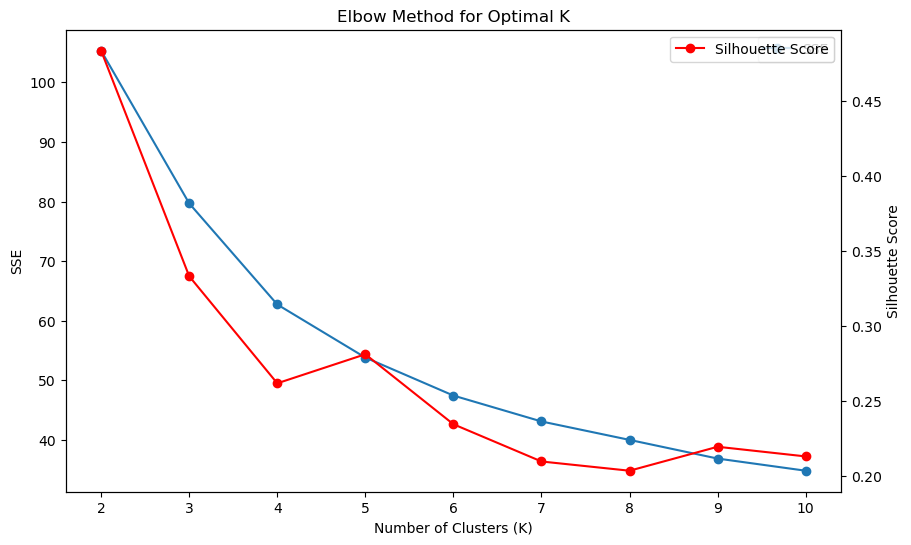

In [117]:
sse = []  # 存储每个K值的SSE
silhouette_scores = []  # 存储每个K值的轮廓系数

K_values = range(2, 11)  # K值的范围

for k in K_values:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(aggregated_df[features])
    sse.append(kmeans.inertia_)  # 计算SSE
    labels = kmeans.predict(aggregated_df[features])
    silhouette_avg = silhouette_score(aggregated_df[features], labels)
    silhouette_scores.append(silhouette_avg)

# 3. 绘制肘部图和轮廓系数
fig, ax1 = plt.subplots(figsize=(10, 6))

# 肘部图 (SSE)
ax1.plot(K_values, sse, marker='o', label='SSE')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('SSE')
ax1.set_title('Elbow Method for Optimal K')
ax1.legend(loc='best')

# 轮廓系数图
ax2 = ax1.twinx()
ax2.plot(K_values, silhouette_scores, marker='o', color='r', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score')
ax2.legend(loc='best')

plt.show()

In [118]:
# Cluster analysis using KMeans again
kmeans = KMeans(n_clusters=2, random_state=42)
aggregated_df['Cluster'] = kmeans.fit_predict(aggregated_df[features])

/Users/evelyn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [119]:
# 计算轮廓系数
silhouette_poll = silhouette_score(aggregated_df[features], aggregated_df['Cluster'])
print(f'silhouette score based on clustering of pollutant concentrations and weather factors:{silhouette_poll}')


silhouette score based on clustering of pollutant concentrations and weather factors:0.48371776121081983


In [120]:
aggregated_df = aggregated_df.merge(site_location, on='site', how='left')
aggregated_df

site       nox       no2        no        o3  \
0                          Aberdeen -0.240460 -0.162216 -0.258657 -0.055439   
1    Aberdeen Union Street Roadside  0.713227  0.664551  0.683818  0.106935   
2          Aberdeen Wellington Road  0.870406  0.720353  0.873664  0.106935   
3                   Armagh Roadside  0.292612  0.057425  0.373825  0.106935   
4                        Aston Hill -0.622025 -0.936239 -0.438792  0.597967   
..                              ...       ...       ...       ...       ...   
161           Worthing A27 Roadside  0.479701  0.568036  0.407224 -0.105095   
162                         Wrexham -0.206801 -0.240493 -0.177905  0.106935   
163                     Yarner Wood -0.606334 -0.893949 -0.439864  0.545527   
164                    York Bootham -0.366863 -0.398866 -0.327727  0.106935   
165                 York Fishergate  0.137667  0.100416  0.143723  0.106935   

         pm10     pm2.5        ws       wd  air_temp  Cluster  latitude  \
0   -0.175693 -0.357634  0.285031 0.183715 -0.281309        0 57.157360   
1   -0.108849 -0.094854  0.285031 0.183715 -0.281309        1 57.144555   
2   -0.108849 -0.094854  0.285031 0.183715 -0.281309        1 57.133888   
3    0.174224 -0.094854  0.192290 0.051748 -0.146197        0 54.353728   
4   -0.108849 -0.094854  0.175432 0.088186 -0.171387        0 52.503850   
..        ...       ...       ...      ...       ...      ...       ...   
161  0.130008  0.070427  0.417151 0.012283  0.352308        1 50.832947   
162 -0.136847 -0.089228  0.102732 0.261173 -0.184096        0 53.042282   
163 -0.108849 -0.094854  0.150975 0.200266  0.010902        0 50.597600   
164 -0.211292  0.079865 -0.165644 0.082813 -0.082103        0 53.967513   
165  0.144618  0.044229 -0.165644 0.082813 -0.082103        0 53.951889   

     longitude  
0    -2.094278  
1    -2.106472  
2    -2.094198  
3    -6.654558  
4    -3.034178  
..         ...  
161  -0.379916  
162  -3.002829  
163  -3.716510  
164  -1.086514  
165  -1.075861  

[166 rows x 13 columns]

In [121]:
# 选择地图的中心点为所有站点经纬度的中点
map_center = [aggregated_df['latitude'].mean(), aggregated_df['longitude'].mean()]

# 创建一个地图对象
m = folium.Map(location=map_center, zoom_start=6)

# 为每个站点添加一个标记，并用不同颜色表示不同的簇
colors = ['red', 'blue', 'green', 'purple'] 
for idx, row in aggregated_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=colors[row['Cluster']], 
        fill=True,
        fill_color=colors[row['Cluster']], 
        fill_opacity=0.6,
        popup=row['site']
    ).add_to(m)

# 显示地图
m


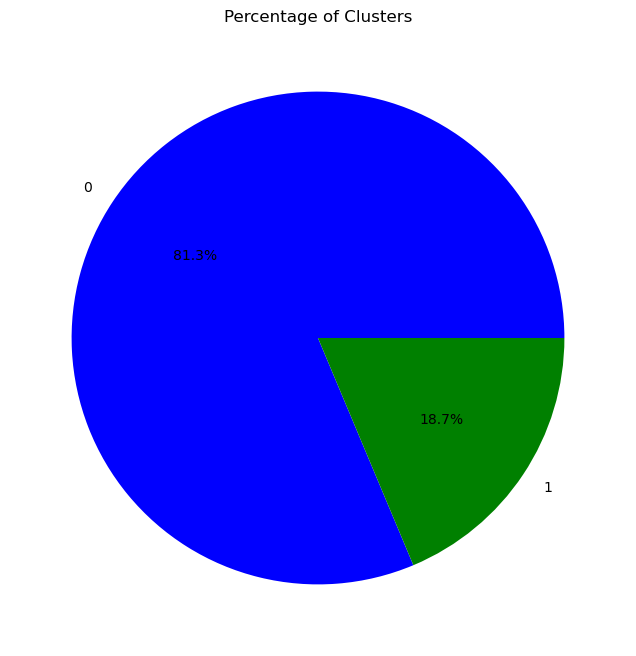

In [122]:
cluster_counts2 = aggregated_df['Cluster'].value_counts()
# 计算每个 cluster 的百分比
cluster_percentages2 = cluster_counts2 / cluster_counts2.sum() * 100
colors = [
    'blue', 'green', 'red', 'purple', 'darkred', 'darkblue', 
]

plt.figure(figsize=(10, 8))
plt.pie(cluster_percentages2, labels=cluster_percentages2.index, autopct='%1.1f%%', colors=colors[:len(cluster_percentages2)])
plt.title('Percentage of Clusters')

plt.show()

## Other clustering methods for clustering

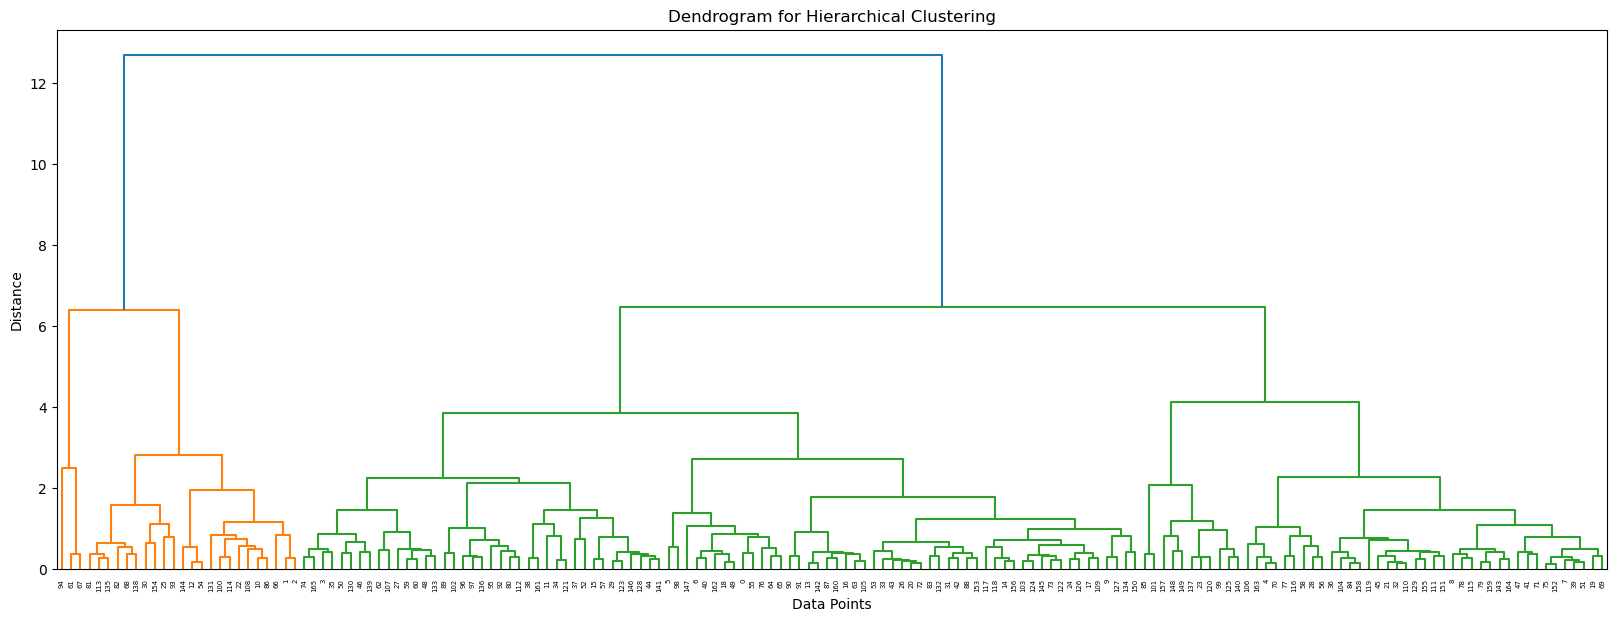

In [123]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate the link matrix, using the ward method
Z = linkage(aggregated_df[features], method='ward')

# Tree mapping
plt.figure(figsize=(20, 7))
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


In [124]:
from sklearn.cluster import AgglomerativeClustering

# Initialise the hierarchical clustering model
hierarchical_clustering = AgglomerativeClustering(n_clusters=2)

# Perform clustering
labels_hierarchical = hierarchical_clustering.fit_predict(aggregated_df[features])

# Add clustering labels to the data
aggregated_df['Cluster_hierarchical'] = labels_hierarchical
aggregated_df

site       nox       no2        no        o3  \
0                          Aberdeen -0.240460 -0.162216 -0.258657 -0.055439   
1    Aberdeen Union Street Roadside  0.713227  0.664551  0.683818  0.106935   
2          Aberdeen Wellington Road  0.870406  0.720353  0.873664  0.106935   
3                   Armagh Roadside  0.292612  0.057425  0.373825  0.106935   
4                        Aston Hill -0.622025 -0.936239 -0.438792  0.597967   
..                              ...       ...       ...       ...       ...   
161           Worthing A27 Roadside  0.479701  0.568036  0.407224 -0.105095   
162                         Wrexham -0.206801 -0.240493 -0.177905  0.106935   
163                     Yarner Wood -0.606334 -0.893949 -0.439864  0.545527   
164                    York Bootham -0.366863 -0.398866 -0.327727  0.106935   
165                 York Fishergate  0.137667  0.100416  0.143723  0.106935   

         pm10     pm2.5        ws       wd  air_temp  Cluster  latitude  \
0   -0.175693 -0.357634  0.285031 0.183715 -0.281309        0 57.157360   
1   -0.108849 -0.094854  0.285031 0.183715 -0.281309        1 57.144555   
2   -0.108849 -0.094854  0.285031 0.183715 -0.281309        1 57.133888   
3    0.174224 -0.094854  0.192290 0.051748 -0.146197        0 54.353728   
4   -0.108849 -0.094854  0.175432 0.088186 -0.171387        0 52.503850   
..        ...       ...       ...      ...       ...      ...       ...   
161  0.130008  0.070427  0.417151 0.012283  0.352308        1 50.832947   
162 -0.136847 -0.089228  0.102732 0.261173 -0.184096        0 53.042282   
163 -0.108849 -0.094854  0.150975 0.200266  0.010902        0 50.597600   
164 -0.211292  0.079865 -0.165644 0.082813 -0.082103        0 53.967513   
165  0.144618  0.044229 -0.165644 0.082813 -0.082103        0 53.951889   

     longitude  Cluster_hierarchical  
0    -2.094278                     0  
1    -2.106472                     1  
2    -2.094198                     1  
3    -6.654558                     0  
4    -3.034178                     0  
..         ...                   ...  
161  -0.379916                     0  
162  -3.002829                     0  
163  -3.716510                     0  
164  -1.086514                     0  
165  -1.075861                     0  

[166 rows x 14 columns]

In [125]:
from genieclust import Genie

# Apply Genie clustering
genie = Genie() 
clusters = genie.fit_predict(aggregated_df[features])

# Clustering results added to the dataset
aggregated_df['Cluster_Genie'] = clusters

aggregated_df

site       nox       no2        no        o3  \
0                          Aberdeen -0.240460 -0.162216 -0.258657 -0.055439   
1    Aberdeen Union Street Roadside  0.713227  0.664551  0.683818  0.106935   
2          Aberdeen Wellington Road  0.870406  0.720353  0.873664  0.106935   
3                   Armagh Roadside  0.292612  0.057425  0.373825  0.106935   
4                        Aston Hill -0.622025 -0.936239 -0.438792  0.597967   
..                              ...       ...       ...       ...       ...   
161           Worthing A27 Roadside  0.479701  0.568036  0.407224 -0.105095   
162                         Wrexham -0.206801 -0.240493 -0.177905  0.106935   
163                     Yarner Wood -0.606334 -0.893949 -0.439864  0.545527   
164                    York Bootham -0.366863 -0.398866 -0.327727  0.106935   
165                 York Fishergate  0.137667  0.100416  0.143723  0.106935   

         pm10     pm2.5        ws       wd  air_temp  Cluster  latitude  \
0   -0.175693 -0.357634  0.285031 0.183715 -0.281309        0 57.157360   
1   -0.108849 -0.094854  0.285031 0.183715 -0.281309        1 57.144555   
2   -0.108849 -0.094854  0.285031 0.183715 -0.281309        1 57.133888   
3    0.174224 -0.094854  0.192290 0.051748 -0.146197        0 54.353728   
4   -0.108849 -0.094854  0.175432 0.088186 -0.171387        0 52.503850   
..        ...       ...       ...      ...       ...      ...       ...   
161  0.130008  0.070427  0.417151 0.012283  0.352308        1 50.832947   
162 -0.136847 -0.089228  0.102732 0.261173 -0.184096        0 53.042282   
163 -0.108849 -0.094854  0.150975 0.200266  0.010902        0 50.597600   
164 -0.211292  0.079865 -0.165644 0.082813 -0.082103        0 53.967513   
165  0.144618  0.044229 -0.165644 0.082813 -0.082103        0 53.951889   

     longitude  Cluster_hierarchical  Cluster_Genie  
0    -2.094278                     0              0  
1    -2.106472                     1              1  
2    -2.094198                     1              1  
3    -6.654558                     0              1  
4    -3.034178                     0              0  
..         ...                   ...            ...  
161  -0.379916                     0              1  
162  -3.002829                     0              0  
163  -3.716510                     0              0  
164  -1.086514                     0              0  
165  -1.075861                     0              1  

[166 rows x 15 columns]

In [126]:
# KMeans的轮廓系数
silhouette_avg_kmeans = silhouette_score(aggregated_df[features], aggregated_df['Cluster'])
print(f"Silhouette Score for KMeans Clustering: {silhouette_avg_kmeans}")

# 层次聚类的轮廓系数
silhouette_hierarchical = silhouette_score(aggregated_df[features], aggregated_df['Cluster_hierarchical'])
print(f"Hierarchical Silhouette Score: {silhouette_hierarchical}")

# 计算Genie聚类的轮廓系数
silhouette_avg_genie = silhouette_score(aggregated_df[features], aggregated_df['Cluster_Genie'])
print(f"Silhouette Score for Genie Clustering: {silhouette_avg_genie}")

Silhouette Score for KMeans Clustering: 0.48371776121081983
Hierarchical Silhouette Score: 0.49772748940842654
Silhouette Score for Genie Clustering: 0.16477404849778549


In [127]:
# Combine site names and corresponding cluster labels into a DataFrame
clustered_mean4 = pd.DataFrame({
    'site': aggregated_df['site'],
    'cluster': aggregated_df['Cluster_hierarchical'],
    'latitude': aggregated_df['latitude'],
    'longitude': aggregated_df['longitude']
    
}).reset_index(drop=True) 
clustered_mean4

site  cluster  latitude  longitude
0                          Aberdeen        0 57.157360  -2.094278
1    Aberdeen Union Street Roadside        1 57.144555  -2.106472
2          Aberdeen Wellington Road        1 57.133888  -2.094198
3                   Armagh Roadside        0 54.353728  -6.654558
4                        Aston Hill        0 52.503850  -3.034178
..                              ...      ...       ...        ...
161           Worthing A27 Roadside        0 50.832947  -0.379916
162                         Wrexham        0 53.042282  -3.002829
163                     Yarner Wood        0 50.597600  -3.716510
164                    York Bootham        0 53.967513  -1.086514
165                 York Fishergate        0 53.951889  -1.075861

[166 rows x 4 columns]

In [128]:
import folium

# 选择地图的中心点为所有站点经纬度的中点
map_center = [clustered_mean4['latitude'].mean(), clustered_mean4['longitude'].mean()]

# 创建一个地图对象
m = folium.Map(location=map_center, zoom_start=6)

# 为每个站点添加一个标记，并用不同颜色表示不同的簇
colors = ['red', 'blue', 'green'] 
for idx, row in clustered_mean4.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=colors[row['cluster']],
        fill=True,
        fill_color=colors[row['cluster']],
        fill_opacity=0.6,
        popup=row['site']
    ).add_to(m)

# 显示地图
m

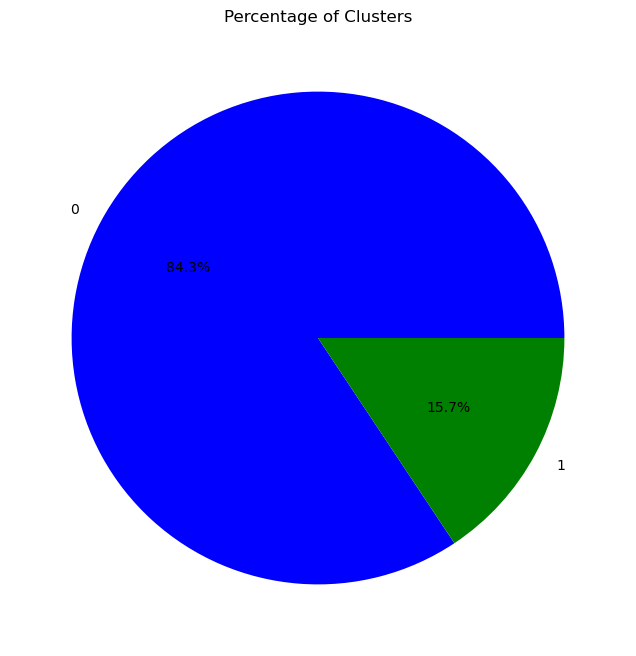

In [129]:
cluster_counts4 = clustered_mean4['cluster'].value_counts()
# 计算每个 cluster 的百分比
cluster_percentages4 = cluster_counts4 / cluster_counts4.sum() * 100
colors = [
    'blue', 'green', 'red', 'purple', 'darkred', 'darkblue', 
]

plt.figure(figsize=(10, 8))
plt.pie(cluster_percentages4, labels=cluster_percentages4.index, autopct='%1.1f%%', colors=colors[:len(cluster_percentages4)])
plt.title('Percentage of Clusters')

plt.show()

# Evaluate this interpolation method

In [130]:
test_copy = test[features+['site']].copy()

# Delete rows with nan values
test_copy = test_copy.dropna()
test_copy

nox       no2        no        o3      pm10     pm2.5        ws  \
0       -0.329585 -0.162697 -0.378848  0.340225 -0.824175 -0.250357  0.208963   
1       -0.288914 -0.030993 -0.380317  0.107088 -1.062543 -0.390760  0.171177   
2       -0.302188 -0.057554 -0.386925  0.098478 -1.224293 -0.648165 -0.282263   
3       -0.217457  0.240370 -0.400144 -0.420119 -1.019978 -0.858769 -0.395623   
4        0.805247  2.435435  0.044865 -1.862652 -0.713504 -0.390760 -0.433409   
...           ...       ...       ...       ...       ...       ...       ...   
1262395 -0.360779 -0.279421 -0.370943  0.175970  0.137811  0.124050 -0.584556   
1262396 -0.488026 -0.583714 -0.412856  0.448183 -0.398518 -0.180156 -0.546769   
1262397 -0.493356 -0.608973 -0.409212  0.460105 -0.321899 -0.390760 -0.508983   
1262398 -0.476034 -0.583889 -0.396455  0.406457 -0.245281 -0.437561 -0.471196   
1262399 -0.512676 -0.667809 -0.410123  0.458119 -0.092044  0.030449 -0.395623   

              wd  air_temp                site  
0       0.697066 -1.235795            Aberdeen  
1       0.867252 -1.130115            Aberdeen  
2       0.869379 -1.077274            Aberdeen  
3       0.724721 -1.288635            Aberdeen  
4       0.704512 -1.429542            Aberdeen  
...          ...       ...                 ...  
1262395 1.031055 -0.425580  Southampton Centre  
1262396 1.029992 -0.425580  Southampton Centre  
1262397 1.035310 -0.390353  Southampton Centre  
1262398 1.061901 -0.319899  Southampton Centre  
1262399 1.152312 -0.284673  Southampton Centre  

[198233 rows x 10 columns]

In [131]:
test_copy['cluster'] = test_copy['site'].map(clustered_data.set_index('site')['cluster'])
test_copy

nox       no2        no        o3      pm10     pm2.5        ws  \
0       -0.329585 -0.162697 -0.378848  0.340225 -0.824175 -0.250357  0.208963   
1       -0.288914 -0.030993 -0.380317  0.107088 -1.062543 -0.390760  0.171177   
2       -0.302188 -0.057554 -0.386925  0.098478 -1.224293 -0.648165 -0.282263   
3       -0.217457  0.240370 -0.400144 -0.420119 -1.019978 -0.858769 -0.395623   
4        0.805247  2.435435  0.044865 -1.862652 -0.713504 -0.390760 -0.433409   
...           ...       ...       ...       ...       ...       ...       ...   
1262395 -0.360779 -0.279421 -0.370943  0.175970  0.137811  0.124050 -0.584556   
1262396 -0.488026 -0.583714 -0.412856  0.448183 -0.398518 -0.180156 -0.546769   
1262397 -0.493356 -0.608973 -0.409212  0.460105 -0.321899 -0.390760 -0.508983   
1262398 -0.476034 -0.583889 -0.396455  0.406457 -0.245281 -0.437561 -0.471196   
1262399 -0.512676 -0.667809 -0.410123  0.458119 -0.092044  0.030449 -0.395623   

              wd  air_temp                site  cluster  
0       0.697066 -1.235795            Aberdeen 1.000000  
1       0.867252 -1.130115            Aberdeen 1.000000  
2       0.869379 -1.077274            Aberdeen 1.000000  
3       0.724721 -1.288635            Aberdeen 1.000000  
4       0.704512 -1.429542            Aberdeen 1.000000  
...          ...       ...                 ...      ...  
1262395 1.031055 -0.425580  Southampton Centre 0.000000  
1262396 1.029992 -0.425580  Southampton Centre 0.000000  
1262397 1.035310 -0.390353  Southampton Centre 0.000000  
1262398 1.061901 -0.319899  Southampton Centre 0.000000  
1262399 1.152312 -0.284673  Southampton Centre 0.000000  

[198233 rows x 11 columns]

In [132]:
test_copy2 = test_copy.copy()

In [133]:
np.random.seed(42)
mask2 = np.random.rand(test_copy2[features].shape[0],test_copy2[features].shape[1]) < 0.2
test_copy2.loc[:,features] = np.where(mask2,np.nan,test_copy2[features])
test_copy2

nox       no2        no        o3      pm10     pm2.5        ws  \
0       -0.329585 -0.162697 -0.378848  0.340225       NaN       NaN       NaN   
1       -0.288914       NaN -0.380317  0.107088 -1.062543       NaN       NaN   
2       -0.302188 -0.057554 -0.386925       NaN -1.224293 -0.648165 -0.282263   
3       -0.217457  0.240370       NaN -0.420119       NaN       NaN -0.395623   
4        0.805247       NaN  0.044865 -1.862652       NaN -0.390760       NaN   
...           ...       ...       ...       ...       ...       ...       ...   
1262395 -0.360779 -0.279421 -0.370943  0.175970  0.137811  0.124050 -0.584556   
1262396 -0.488026       NaN -0.412856       NaN -0.398518       NaN -0.546769   
1262397 -0.493356 -0.608973 -0.409212  0.460105 -0.321899       NaN -0.508983   
1262398 -0.476034       NaN -0.396455  0.406457 -0.245281 -0.437561 -0.471196   
1262399       NaN -0.667809 -0.410123       NaN -0.092044  0.030449 -0.395623   

              wd  air_temp                site  cluster  
0       0.697066 -1.235795            Aberdeen 1.000000  
1       0.867252 -1.130115            Aberdeen 1.000000  
2       0.869379       NaN            Aberdeen 1.000000  
3       0.724721 -1.288635            Aberdeen 1.000000  
4       0.704512 -1.429542            Aberdeen 1.000000  
...          ...       ...                 ...      ...  
1262395 1.031055 -0.425580  Southampton Centre 0.000000  
1262396 1.029992       NaN  Southampton Centre 0.000000  
1262397 1.035310 -0.390353  Southampton Centre 0.000000  
1262398      NaN -0.319899  Southampton Centre 0.000000  
1262399      NaN -0.284673  Southampton Centre 0.000000  

[198233 rows x 11 columns]

In [134]:
test_copy2.isna().sum()

nox         39566
no2         39604
no          39367
o3          39376
pm10        39320
pm2.5       39744
ws          39760
wd          39478
air_temp    39575
site            0
cluster         0
dtype: int64

In [135]:
# Calculate the mean value of each cluster on a particular column, ignoring NaN values
cluster_means2 = test_copy2.groupby('cluster')[features].mean()
cluster_means2

nox       no2        no        o3      pm10     pm2.5  \
cluster                                                                
0.000000  0.059768  0.189911 -0.001712 -0.295535 -0.005605  0.065641   
1.000000 -0.254926 -0.193814 -0.265018 -0.083868 -0.139391 -0.110684   

                ws        wd  air_temp  
cluster                                 
0.000000 -0.099846 -0.078074  0.093553  
1.000000 -0.063447  0.017382 -0.069794

In [136]:
#对每个簇的缺失值进行填补
for col in features:
    for cluster_id2 in cluster_means2.index:
        #找到当前簇中当前列的缺失值
        missing2 = (test_copy2['cluster'] == cluster_id2) & (test_copy2[col].isnull())
        #用对应簇的均值去填补缺失值
        test_copy2.loc[missing2,col] = cluster_means2.loc[cluster_id2,col]
test_copy2.isna().sum()        

nox         0
no2         0
no          0
o3          0
pm10        0
pm2.5       0
ws          0
wd          0
air_temp    0
site        0
cluster     0
dtype: int64

In [137]:
from sklearn.metrics import mean_squared_error

# 提取原始数据中的实际值
actual_values2 = test_copy.loc[mask2, features]

# 提取插补后的数据
imputed_values2 = test_copy2.loc[mask2, features]

# 计算RMSE
rmse2 = np.sqrt(mean_squared_error(actual_values2, imputed_values2))
print(f"RMSE for selected features: {rmse2}")

RMSE for selected features: 0.5262341822697316


In [138]:
from sklearn.metrics import mean_squared_error

# 计算 RMSE
for col in features:  
    rmse = np.sqrt(mean_squared_error(test_copy[col], test_copy2[col]))
    print(f"RMSE for {col}: {rmse}")


RMSE for nox: 0.42497054438383597
RMSE for no2: 0.4454801159045333
RMSE for no: 0.4150310901162529
RMSE for o3: 0.4360579196889742
RMSE for pm10: 0.4428763103716003
RMSE for pm2.5: 0.43891865989162926
RMSE for ws: 0.429592485956505
RMSE for wd: 0.45457946732347243
RMSE for air_temp: 0.440004048433368


In [139]:
features

['nox', 'no2', 'no', 'o3', 'pm10', 'pm2.5', 'ws', 'wd', 'air_temp']

# Time series analysis

In [140]:
no2_df2 = no2_df.T
no2_df2

site                       Aberdeen  Aberdeen Union Street Roadside  \
date                                                                  
2018-01-01 00:00:00+00:00  0.000803                        1.532833   
2018-01-01 01:00:00+00:00  0.150267                        0.838130   
2018-01-01 02:00:00+00:00  0.120123                        2.133658   
2018-01-01 03:00:00+00:00  0.458219                        0.841260   
2018-01-01 04:00:00+00:00  2.949260                        0.796544   
...                             ...                             ...   
2018-12-31 19:00:00+00:00 -0.665611                        1.098411   
2018-12-31 20:00:00+00:00 -0.623395                        0.746137   
2018-12-31 21:00:00+00:00 -0.878694                       -0.251251   
2018-12-31 22:00:00+00:00 -0.918574                       -0.401358   
2018-12-31 23:00:00+00:00 -1.029754                       -0.875608   

site                       Aberdeen Wellington Road  Birmingham Acocks Green  \
date                                                                           
2018-01-01 00:00:00+00:00                 -0.922710                -0.775519   
2018-01-01 01:00:00+00:00                 -0.792070                -0.919184   
2018-01-01 02:00:00+00:00                 -0.621783                -0.935902   
2018-01-01 03:00:00+00:00                 -0.856671                -1.128095   
2018-01-01 04:00:00+00:00                 -0.967660                -1.128193   
...                                             ...                      ...   
2018-12-31 19:00:00+00:00                 -0.263653                -0.455694   
2018-12-31 20:00:00+00:00                 -0.889702                -0.702793   
2018-12-31 21:00:00+00:00                 -0.984359                -0.841027   
2018-12-31 22:00:00+00:00                 -0.768614                -0.928919   
2018-12-31 23:00:00+00:00                 -1.204452                -0.949914   

site                       Aston Hill  Armagh Roadside  Ballymena Antrim Road  \
date                                                                            
2018-01-01 00:00:00+00:00   -0.620932        -1.018561              -0.690031   
2018-01-01 01:00:00+00:00   -0.682823        -0.816466              -0.636511   
2018-01-01 02:00:00+00:00   -0.695894        -0.795469              -0.837098   
2018-01-01 03:00:00+00:00   -0.710833        -0.961581              -0.945588   
2018-01-01 04:00:00+00:00   -0.726573        -1.110040              -0.939966   
...                               ...              ...                    ...   
2018-12-31 19:00:00+00:00   -0.946596        -0.077168              -0.258929   
2018-12-31 20:00:00+00:00   -0.934144        -0.256361              -0.305567   
2018-12-31 21:00:00+00:00   -0.884330        -0.448284              -0.731461   
2018-12-31 22:00:00+00:00   -0.884330        -0.708100              -0.651774   
2018-12-31 23:00:00+00:00   -0.846970        -0.807099              -0.754021   

site                       Ballymena Ballykeel  Barnsley Gawber  \
date                                                              
2018-01-01 00:00:00+00:00            -0.234630        -0.914347   
2018-01-01 01:00:00+00:00            -0.238238        -0.925091   
2018-01-01 02:00:00+00:00            -0.280574        -1.052809   
2018-01-01 03:00:00+00:00            -0.273858        -1.101183   
2018-01-01 04:00:00+00:00            -0.326457        -1.141517   
...                                        ...              ...   
2018-12-31 19:00:00+00:00            -0.527638        -0.732135   
2018-12-31 20:00:00+00:00            -0.628764        -0.797344   
2018-12-31 21:00:00+00:00            -0.823994        -0.825865   
2018-12-31 22:00:00+00:00            -0.883385        -0.858461   
2018-12-31 23:00:00+00:00            -0.886797        -0.944026   

site                       Bath Roadside  ...  Wirral Tranmere  \
date                                      .

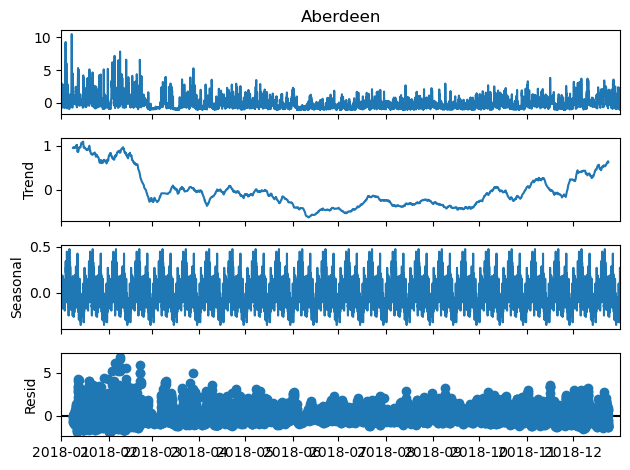

In [141]:
from statsmodels.tsa.seasonal import seasonal_decompose

aberdeen_no2 = no2_df2['Aberdeen']

# Time series decomposition of NO2 data from this site
result_aberdeen = seasonal_decompose(aberdeen_no2, model='additive', period=365)

# Plotting decomposition results
result_aberdeen.plot()
plt.show()


In [142]:
pm25_df2 = pm25_df.T
pm25_df2

site                       Aberdeen  Auchencorth Moss  \
date                                                    
2018-01-01 00:00:00+00:00  0.200088         -0.800228   
2018-01-01 01:00:00+00:00 -0.029162         -0.716286   
2018-01-01 02:00:00+00:00 -0.449452         -0.800228   
2018-01-01 03:00:00+00:00 -0.793327         -0.821213   
2018-01-01 04:00:00+00:00 -0.029162         -0.422490   
...                             ...               ...   
2018-12-31 19:00:00+00:00 -0.716910         -0.220609   
2018-12-31 20:00:00+00:00 -0.984368         -0.512517   
2018-12-31 21:00:00+00:00 -0.564077         -0.690684   
2018-12-31 22:00:00+00:00 -0.869743         -0.834224   
2018-12-31 23:00:00+00:00  0.028151         -0.913549   

site                       Birmingham Acocks Green  Belfast Centre  \
date                                                                 
2018-01-01 00:00:00+00:00                 1.418857       -0.376034   
2018-01-01 01:00:00+00:00                -0.487009       -0.336605   
2018-01-01 02:00:00+00:00                -0.984720       -0.349748   
2018-01-01 03:00:00+00:00                -0.996859       -0.086887   
2018-01-01 04:00:00+00:00                -0.766213       -0.612610   
...                                            ...             ...   
2018-12-31 19:00:00+00:00                -0.256363        0.898844   
2018-12-31 20:00:00+00:00                -0.547706        0.793699   
2018-12-31 21:00:00+00:00                -0.511288        0.346835   
2018-12-31 22:00:00+00:00                -0.304920        0.044544   
2018-12-31 23:00:00+00:00                -0.025717        0.228547   

site                       London Bexley  Birmingham A4540 Roadside  \
date                                                                  
2018-01-01 00:00:00+00:00      -0.144260                  -0.107729   
2018-01-01 01:00:00+00:00      -0.437442                  -0.614017   
2018-01-01 02:00:00+00:00      -0.877216                  -1.338933   
2018-01-01 03:00:00+00:00      -0.898157                  -0.982237   
2018-01-01 04:00:00+00:00      -0.992394                  -0.936140   
...                                  ...                        ...   
2018-12-31 19:00:00+00:00      -0.248968                  -0.768309   
2018-12-31 20:00:00+00:00       0.107040                  -0.779498   
2018-12-31 21:00:00+00:00      -0.060493                  -0.768309   
2018-12-31 22:00:00+00:00      -0.039552                  -0.689989   
2018-12-31 23:00:00+00:00      -0.259438                  -0.689989   

site                       Blackpool Marton  Birmingham Ladywood  Bournemouth  \
date                                                                            
2018-01-01 00:00:00+00:00         -0.876709            -0.058501     1.031206   
2018-01-01 01:00:00+00:00         -0.242169            -0.768118    -0.481226   
2018-01-01 02:00:00+00:00         -0.533000            -1.090806    -0.618720   
2018-01-01 03:00:00+00:00         -0.731294            -0.886880    -0.481226   
2018-01-01 04:00:00+00:00         -0.374365            -0.884870    -0.068744   
...                                     ...                  ...          ...   
2018-12-31 19:00:00+00:00         -0.338565            -0.411370     0.206243   
2018-12-31 20:00:00+00:00          0.018026            -0.289551     0.343737   
2018-12-31 21:00:00+00:00         -0.487466            -0.618461    -0.068744   
2018-12-31 22:00:00+00:00         -0.370388            -0.362643     0.343737   
2018-12-31 23:00:00+00:00         -0.516182            -0.350461     0.343737   

site                       Barnstaple A39  ...  Sunderland Silksworth  \
date                                       ...                          
2018-01-01 00:00:00+00:00       -0.827195  ...              -0.742923   
2018-01-01 01:00:00+00:00       -0.525390  ...              -0.891141   
2018-01-01 02:00:00+00:00       -0.424788  ...              -0.796820   
2018

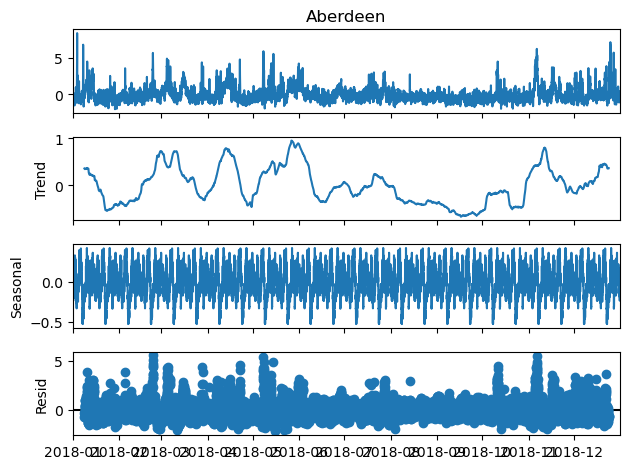

In [143]:
from statsmodels.tsa.seasonal import seasonal_decompose

aberdeen_pm25 = pm25_df2['Aberdeen']

# Time series decomposition of pm25 data from this site
result_aberdeen2 = seasonal_decompose(aberdeen_pm25, model='additive', period=365)


result_aberdeen2.plot()
plt.show()


In [144]:
pm10_df2 = pm10_df.T
pm10_df2

site                       Aberdeen  Auchencorth Moss  Armagh Roadside  \
date                                                                     
2018-01-01 00:00:00+00:00 -0.794244         -0.677650        -0.475860   
2018-01-01 01:00:00+00:00 -1.089389         -0.818646        -0.693276   
2018-01-01 02:00:00+00:00 -1.289666         -1.312132        -0.657883   
2018-01-01 03:00:00+00:00 -1.036684         -1.241634        -0.622490   
2018-01-01 04:00:00+00:00 -0.657212         -1.400254        -0.597209   
...                             ...               ...              ...   
2018-12-31 19:00:00+00:00 -1.447779         -0.281099         0.201672   
2018-12-31 20:00:00+00:00 -1.163175         -0.558685         0.075266   
2018-12-31 21:00:00+00:00 -0.825867         -0.818646         0.039873   
2018-12-31 22:00:00+00:00 -0.604508         -0.972860        -0.066307   
2018-12-31 23:00:00+00:00 -0.077463         -1.043358        -0.126982   

site                       Belfast Stockman's Lane  Belfast Centre  \
date                                                                 
2018-01-01 00:00:00+00:00                -0.669235       -0.790525   
2018-01-01 01:00:00+00:00                -0.583012       -1.047945   
2018-01-01 02:00:00+00:00                -0.928010       -1.249403   
2018-01-01 03:00:00+00:00                -0.841786       -1.115098   
2018-01-01 04:00:00+00:00                -1.014233       -0.991984   
...                                            ...             ...   
2018-12-31 19:00:00+00:00                -0.065463        0.373460   
2018-12-31 20:00:00+00:00                -0.841786        0.250346   
2018-12-31 21:00:00+00:00                -0.755459       -0.398799   
2018-12-31 22:00:00+00:00                -0.583012       -0.309262   
2018-12-31 23:00:00+00:00                -0.583012       -0.354030   

site                       Birmingham A4540 Roadside  Birmingham Ladywood  \
date                                                                        
2018-01-01 00:00:00+00:00                  -0.213194            -0.544888   
2018-01-01 01:00:00+00:00                  -0.827023            -0.484778   
2018-01-01 02:00:00+00:00                  -0.837423            -0.678191   
2018-01-01 03:00:00+00:00                  -0.912001            -0.655066   
2018-01-01 04:00:00+00:00                  -0.985613            -1.184639   
...                                              ...                  ...   
2018-12-31 19:00:00+00:00                  -0.078935             0.146143   
2018-12-31 20:00:00+00:00                  -0.253180            -0.098864   
2018-12-31 21:00:00+00:00                  -0.427424            -0.087727   
2018-12-31 22:00:00+00:00                  -0.427424             0.123869   
2018-12-31 23:00:00+00:00                  -0.244009             0.101596   

site                       Barnstaple A39  Bristol Temple Way  \
date                                                            
2018-01-01 00:00:00+00:00       -0.624841           -0.493724   
2018-01-01 01:00:00+00:00        0.024509           -0.649274   
2018-01-01 02:00:00+00:00        0.208492           -0.882679   
2018-01-01 03:00:00+00:00        0.273426           -0.649274   
2018-01-01 04:00:00+00:00        0.565634           -0.649274   
...                                   ...                 ...   
2018-12-31 19:00:00+00:00        0.178730           -0.649274   
2018-12-31 20:00:00+00:00        0.806218           -1.193779   
2018-12-31 21:00:00+00:00        0.492474           -0.571499   
2018-12-31 22:00:00+00:00        0.492474           -0.415869   
2018-12-31 23:00:00+00:00        0.597019           -0.727049   

site                       Bristol St Paul's  ...  St Helens Linkway  \
date                                          ...                      
2018-01-01 00:00:00+00:00           0.198170  ...           0.684924   
2018-01-01 01:00:00+00:00          -0.364369  ...          -0.

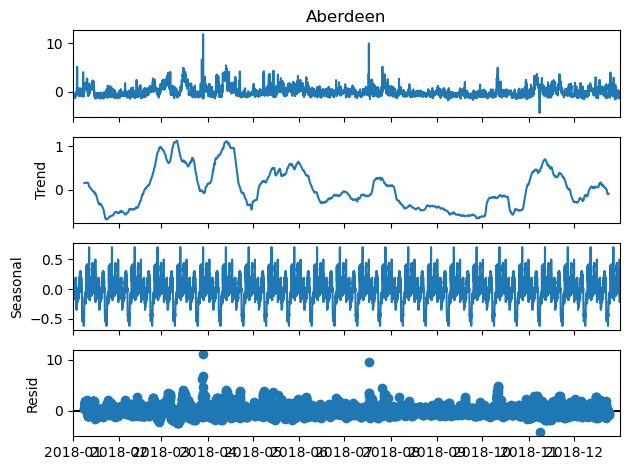

In [145]:
from statsmodels.tsa.seasonal import seasonal_decompose

aberdeen_pm10 = pm10_df2['Aberdeen']

# Time series decomposition of pm10 data from this site
result_aberdeen3 = seasonal_decompose(aberdeen_pm10, model='additive', period=365)


result_aberdeen3.plot()
plt.show()


In [146]:
o3_df2 = o3_df.T
o3_df2

site                       Aberdeen  Auchencorth Moss  \
date                                                    
2018-01-01 00:00:00+00:00  0.452483          0.244648   
2018-01-01 01:00:00+00:00  0.189279          0.213897   
2018-01-01 02:00:00+00:00  0.179558          0.081282   
2018-01-01 03:00:00+00:00 -0.405920          0.130292   
2018-01-01 04:00:00+00:00 -2.034490          0.343628   
...                             ...               ...   
2018-12-31 19:00:00+00:00  0.805414          0.012092   
2018-12-31 20:00:00+00:00  0.706713          0.138941   
2018-12-31 21:00:00+00:00  0.953466          0.170653   
2018-12-31 22:00:00+00:00  1.114977          0.355160   
2018-12-31 23:00:00+00:00  1.399865          0.363809   

site                       Birmingham Acocks Green  Aston Hill  \
date                                                             
2018-01-01 00:00:00+00:00                 0.400190    0.562458   
2018-01-01 01:00:00+00:00                 0.345701    0.582715   
2018-01-01 02:00:00+00:00                 0.374989    0.842692   
2018-01-01 03:00:00+00:00                 0.808184    0.781918   
2018-01-01 04:00:00+00:00                 0.699885    0.733806   
...                                            ...         ...   
2018-12-31 19:00:00+00:00                 0.587500    0.546565   
2018-12-31 20:00:00+00:00                 0.732579    0.515131   
2018-12-31 21:00:00+00:00                 0.898093    0.376295   
2018-12-31 22:00:00+00:00                 0.914440    0.245318   
2018-12-31 23:00:00+00:00                 0.887876    0.085525   

site                       Barnsley Gawber  Belfast Centre  \
date                                                         
2018-01-01 00:00:00+00:00         0.595242        1.060808   
2018-01-01 01:00:00+00:00         0.656076        1.041957   
2018-01-01 02:00:00+00:00         0.664767        1.055310   
2018-01-01 03:00:00+00:00         0.710392        0.838515   
2018-01-01 04:00:00+00:00         0.827715        1.003468   
...                                    ...             ...   
2018-12-31 19:00:00+00:00         0.599587       -0.742673   
2018-12-31 20:00:00+00:00         0.584379       -0.389203   
2018-12-31 21:00:00+00:00         0.571342       -0.304371   
2018-12-31 22:00:00+00:00         0.532235        0.228190   
2018-12-31 23:00:00+00:00         0.577861        0.376648   

site                       Birmingham A4540 Roadside  Blackpool Marton  \
date                                                                     
2018-01-01 00:00:00+00:00                   0.634439          0.671022   
2018-01-01 01:00:00+00:00                   0.719680          0.732865   
2018-01-01 02:00:00+00:00                   1.204133          0.575446   
2018-01-01 03:00:00+00:00                   1.440676          0.765192   
2018-01-01 04:00:00+00:00                   1.363959          0.849524   
...                                              ...               ...   
2018-12-31 19:00:00+00:00                   0.319758          0.363231   
2018-12-31 20:00:00+00:00                   0.221730          0.456574   
2018-12-31 21:00:00+00:00                   0.430571          0.461554   
2018-12-31 22:00:00+00:00                   0.664983          0.486351   
2018-12-31 23:00:00+00:00                   0.517943          0.528258   

site                       Bournemouth  Bristol St Paul's  ...  \
date                                                       ...   
2018-01-01 00:00:00+00:00     0.665414           0.595719  ...   
2018-01-01 01:00:00+00:00     0.801541           0.551824  ...   
2018-01-01 02:00:00+00:00     0.889052           0.903672  ...   
2018-01-01 03:00:00+00:00     0.778205           0.611495  ...   
2018-01-01 04:00:00+00:00     0.982397           0.477751  ...   
...                                ...                ...  ...   
2018-12-31 19:00:00+00:00     0.284256           0.496369  ...   
2018-12-31 20:00:00+00:00     0.321

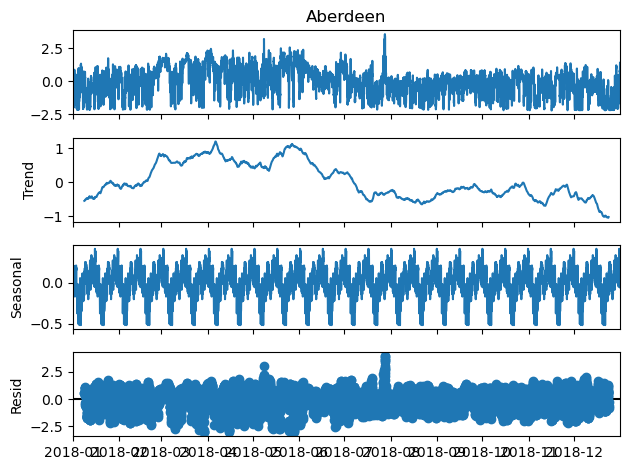

In [147]:
from statsmodels.tsa.seasonal import seasonal_decompose

aberdeen_o3 = o3_df2['Aberdeen']

# Time series decomposition of o3 data from this site
result_aberdeen4 = seasonal_decompose(aberdeen_o3, model='additive', period=365)


result_aberdeen4.plot()
plt.show()


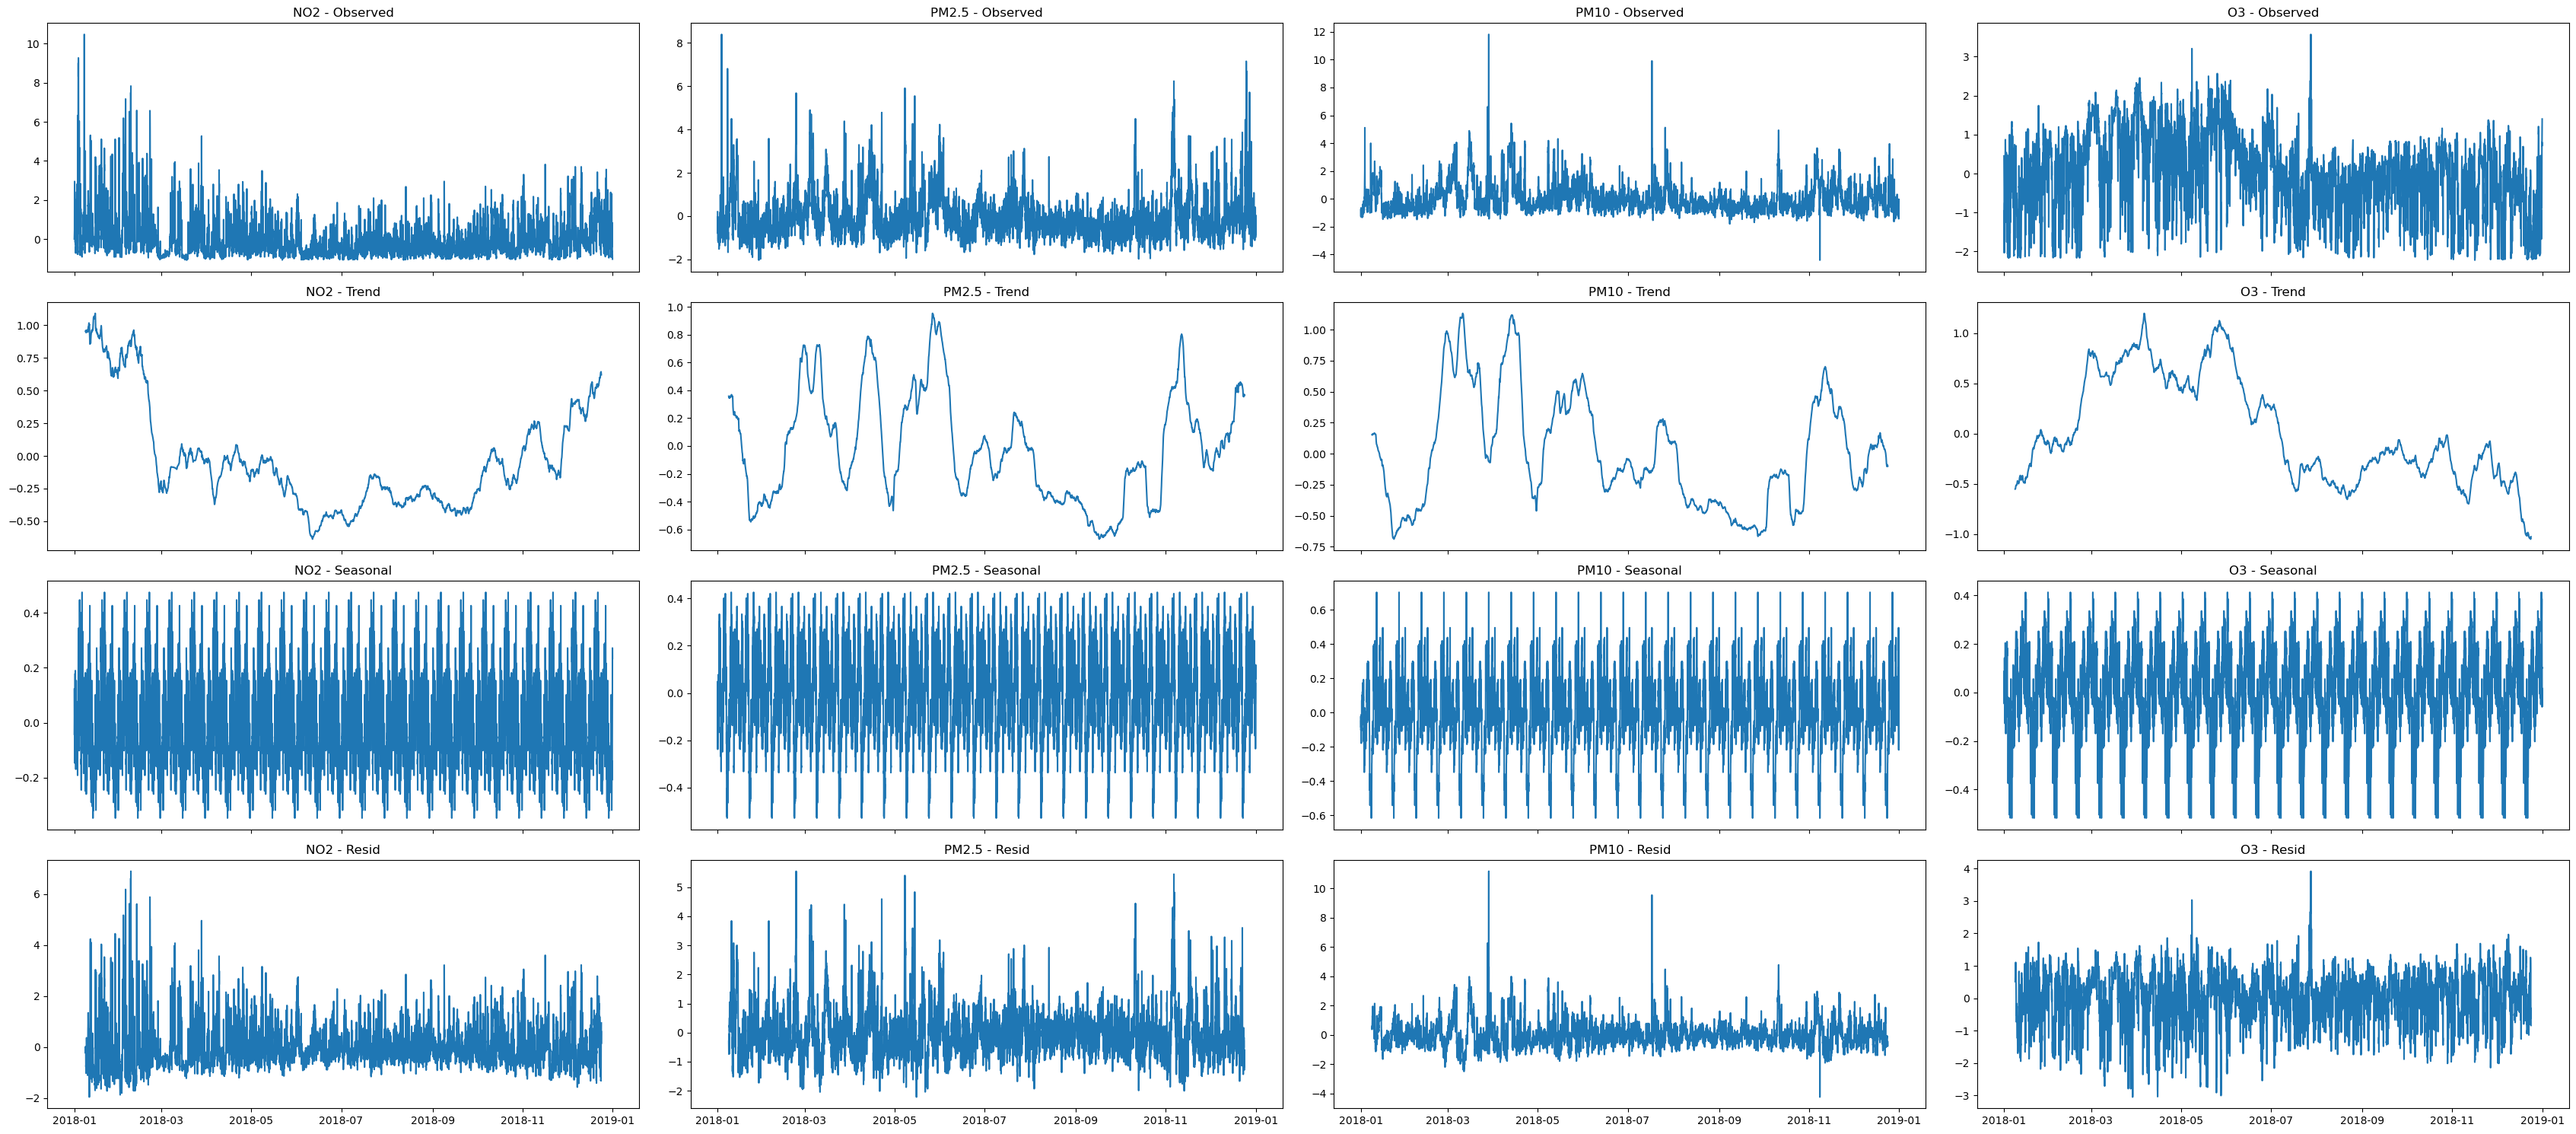

In [148]:
# Create subgraphs defining a layout of one row and four columns to facilitate comparison of decomposition results for the four pollutants
fig, axs = plt.subplots(4, 4, figsize=(34, 15), sharex=True)

# Column 1: Contaminant 1
axs[0, 0].plot(result_aberdeen.observed)
axs[0, 0].set_title('NO2 - Observed')
axs[1, 0].plot(result_aberdeen.trend)
axs[1, 0].set_title('NO2 - Trend')
axs[2, 0].plot(result_aberdeen.seasonal)
axs[2, 0].set_title('NO2 - Seasonal')
axs[3, 0].plot(result_aberdeen.resid)
axs[3, 0].set_title('NO2 - Resid')

# Column 2: Contaminant 2 
axs[0, 1].plot(result_aberdeen2.observed)
axs[0, 1].set_title('PM2.5 - Observed')
axs[1, 1].plot(result_aberdeen2.trend)
axs[1, 1].set_title('PM2.5 - Trend')
axs[2, 1].plot(result_aberdeen2.seasonal)
axs[2, 1].set_title('PM2.5 - Seasonal')
axs[3, 1].plot(result_aberdeen2.resid)
axs[3, 1].set_title('PM2.5 - Resid')

# Column 3: Contaminant 3 
axs[0, 2].plot(result_aberdeen3.observed)
axs[0, 2].set_title('PM10 - Observed')
axs[1, 2].plot(result_aberdeen3.trend)
axs[1, 2].set_title('PM10 - Trend')
axs[2, 2].plot(result_aberdeen3.seasonal)
axs[2, 2].set_title('PM10 - Seasonal')
axs[3, 2].plot(result_aberdeen3.resid)
axs[3, 2].set_title('PM10 - Resid')

# Column 4: Contaminant 4
axs[0, 3].plot(result_aberdeen4.observed)
axs[0, 3].set_title('O3 - Observed')
axs[1, 3].plot(result_aberdeen4.trend)
axs[1, 3].set_title('O3 - Trend')
axs[2, 3].plot(result_aberdeen4.seasonal)
axs[2, 3].set_title('O3 - Seasonal')
axs[3, 3].plot(result_aberdeen4.resid)
axs[3, 3].set_title('O3 - Resid')

# Set up subgraph layouts to avoid overlap
plt.tight_layout()
plt.show()
